<h1>Table of Contents for EDA<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparing-environment-and-uploading-data" data-toc-modified-id="Preparing-environment-and-uploading-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparing environment and uploading data</a></span><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Load-Datasets" data-toc-modified-id="Load-Datasets-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load Datasets</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Take-a-First-Look-of-our-Data:" data-toc-modified-id="Take-a-First-Look-of-our-Data:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Take a First Look of our Data:</a></span></li><li><span><a href="#Some-Observations-from-the-STR-Details:" data-toc-modified-id="Some-Observations-from-the-STR-Details:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Some Observations from the STR Details:</a></span></li><li><span><a href="#First-see-of-some-stats-of-Numeric-Data" data-toc-modified-id="First-see-of-some-stats-of-Numeric-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>First see of some stats of Numeric Data</a></span></li><li><span><a href="#Overall-Quality" data-toc-modified-id="Overall-Quality-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Overall Quality</a></span></li><li><span><a href="#Total-Rooms-above-Ground-and-Living-Area" data-toc-modified-id="Total-Rooms-above-Ground-and-Living-Area-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Total Rooms above Ground and Living Area</a></span></li><li><span><a href="#Garage-areas-and-parking" data-toc-modified-id="Garage-areas-and-parking-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Garage areas and parking</a></span></li><li><span><a href="#Total-Basement-Area-Vs-1st-Flor-Area" data-toc-modified-id="Total-Basement-Area-Vs-1st-Flor-Area-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Total Basement Area Vs 1st Flor Area</a></span></li><li><span><a href="#Year-Built-Vs-Garage-Year-Built" data-toc-modified-id="Year-Built-Vs-Garage-Year-Built-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Year Built Vs Garage Year Built</a></span></li><li><span><a href="#Bathrooms-Features" data-toc-modified-id="Bathrooms-Features-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Bathrooms Features</a></span></li><li><span><a href="#Reviwe-Porch-Features:" data-toc-modified-id="Reviwe-Porch-Features:-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Reviwe Porch Features:</a></span></li><li><span><a href="#Slope-of-property-and-Lot-area" data-toc-modified-id="Slope-of-property-and-Lot-area-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Slope of property and Lot area</a></span></li><li><span><a href="#Neighborhood" data-toc-modified-id="Neighborhood-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>Neighborhood</a></span></li><li><span><a href="#Check-the-Dependent-Variable---SalePrice:" data-toc-modified-id="Check-the-Dependent-Variable---SalePrice:-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>Check the Dependent Variable - SalePrice


## Preparing environment and uploading data
### Import Packages

In [107]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
import pylab 

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from scipy.special import boxcox1p
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFECV, SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA, KernelPCA
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression, OrthogonalMatchingPursuit, Lasso, LassoLarsIC, ElasticNet, ElasticNetCV
from sklearn.linear_model import SGDRegressor, PassiveAggressiveRegressor, HuberRegressor, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [108]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

train.rename(columns={'3SsnPorch':'TSsnPorch'}, inplace=True)
test.rename(columns={'3SsnPorch':'TSsnPorch'}, inplace=True)

test['SalePrice'] = 0

In [109]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [110]:
numeric_cols = train.select_dtypes(include=[int, float]).columns

In [111]:
numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'TSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [112]:
train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

## Exploratory Data Analysis (EDA)

### Take a First Look of our Data:
I created the function below to simplify the analysis of general characteristics of the data. Inspired on the str function of R, this function returns the types, counts, distinct, count nulls, missing ratio and uniques values of each field/feature.

If the study involve some supervised learning, this function can return the study of the correlation, for this we just need provide the dependent variable to the pred parameter.

Also, if its return is stored in a variable you can evaluate it in more detail, focus on specific field, or sort them from different perspectives.

In [113]:
import pandas as pd

def rstr(df, pred=None):
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()]).T.squeeze()
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ratio = (df.isnull().sum() / obs) * 100
    numeric_cols = df.select_dtypes(include=[int, float]).columns
    skewness = df[numeric_cols].skew()
    kurtosis = df[numeric_cols].kurt()
    print('Data shape:', df.shape)

    if pred is None:
        data = pd.DataFrame({'types': types, 'counts': counts, 'distincts': distincts, 'nulls': nulls, 'missing_ratio': missing_ratio, 'uniques': uniques, 'skewness': skewness, 'kurtosis': kurtosis})
    else:
        corr = df[numeric_cols].corr()[pred]
        data = pd.DataFrame({'types': types, 'counts': counts, 'distincts': distincts, 'nulls': nulls, 'missing_ratio': missing_ratio, 'uniques': uniques, 'skewness': skewness, 'kurtosis': kurtosis, f'corr {pred}': corr})

    dtypes = data.types.value_counts()
    print('___________________________\nData types:\n', dtypes)
    print('___________________________')
    return data

In [114]:
details = rstr(train, 'SalePrice')
display(details.sort_values(by='corr SalePrice', ascending=False))

Data shape: (1460, 80)
___________________________
Data types:
 types
object     43
int64      34
float64     3
Name: count, dtype: int64
___________________________


,types,counts,distincts,nulls,missing_ratio,uniques,skewness,kurtosis,corr SalePrice
SalePrice,int64,1460,663,0,0.000,"[208500, 181500, 223500, 140000, 250000, 14300...",1.883,6.536,1.000
OverallQual,int64,1460,10,0,0.000,"[7, 6, 8, 5, 9, 4, 10, 3, 1, 2]",0.217,0.096,0.791
GrLivArea,int64,1460,861,0,0.000,"[1710, 1262, 1786, 1717, 2198, 1362, 1694, 209...",1.367,4.895,0.709
GarageCars,int64,1460,5,0,0.000,"[2, 3, 1, 0, 4]",-0.343,0.221,0.640
GarageArea,int64,1460,441,0,0.000,"[548, 460, 608, 642, 836, 480, 636, 484, 468, ...",0.180,0.917,0.623
...,...,...,...,...,...,...,...,...,...
RoofStyle,object,1460,6,0,0.000,"[Gable, Hip, Gambrel, Mansard, Flat, Shed]",NaN,NaN,NaN
SaleCondition,object,1460,6,0,0.000,"[Normal, Abnorml, Partial, AdjLand, Alloca, Fa...",NaN,NaN,NaN
SaleType,object,1460,9,0,0.000,"[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ...",NaN,NaN,NaN
Street,object,1460,2,0,0.000,"[Pave, Grvl]",NaN,NaN,NaN


### Some Observations from the STR Details:
<!-- ![image](https://imgs.xkcd.com/comics/science_valentine.png) -->
- The dependent variabel, **SalePrice**, are ***skewed*** and ***heavy-tailed distribution***. We need investigate its distribution with a plot and check if a **transformation by Log 1P** could correct it, withou drop most of the **outiliers**.
<p>
 
- Nulls: The data have 19 features with nulls, five of then area categorical and with more then 47% of missing ration. They are candidates to drop or use them to create another more interesting feature:
 - PoolQC
 - MiscFeature
 - Alley
 - Fence
 - FireplaceQu

<p>
    
- Features ***high skewed right***, ***heavy-tailed distribution***, and with ***high correlation*** to Sales Price. It is important to treat them (boxcox 1p transformation, Robustscaler, and drop some outliers):
 - TotalBsmtSF
 - 1stFlrSF
 - GrLivArea

<p>
    
- Features ***skewed***, ***heavy-tailed distribution***, and with ***good correlation*** to Sales Price. It is important to treat them (boxcox 1p transformation, Robustscaler, and drop some outliers):
 - LotArea
 - KitchenAbvGr
 - ScreenPorch
 - EnclosedPorch
 - MasVnrArea
 - OpenPorchSF
 - LotFrontage
 - BsmtFinSF1
 - WoodDeckSF
 - MSSubClass

<p>
    
- Features ***high skewed***, ***heavy-tailed distribution***, and with ***low correlation*** to Sales Price. Maybe we can drop these features, or just use they with other to create a new more importants feature:
 - MiscVal
 - TSsnPorch
 - LowQualFinSF
 - BsmtFinSF2
 - BsmtHalfBa

<p>
    
- Features ***low skewed***, and with ***good to low correlation*** to Sales Price. Just use a Robustscaler probably reduce the few  distorcions:
 - BsmtUnfSF
 - 2ndFlrSF
 - TotRmsAbvGrd
 - HalfBath
 - Fireplaces
 - BsmtFullBath
 - OverallQual
 - BedroomAbvGr
 - GarageArea
 - FullBath
 - GarageCars
 - OverallCond

<p>
    
- Transforme from Yaer Feature to Age, 2011 - Year feature, or YEAR(TODAY()) - Year Feature
 - YearRemodAdd: 
 - YearBuilt
 - GarageYrBlt
 - YrSold

If we apply this data to a Keras, first we need to chnage the float64 and Int64 to float32 and Int32!

### First see of some stats of Numeric Data
So, for the main statistics of our numeric data describe the function (like the summary of R)

In [115]:
display(train.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.000,56.897,42.301,20.000,20.000,50.000,70.000,190.000
LotFrontage,1201.000,70.050,24.285,21.000,59.000,69.000,80.000,313.000
LotArea,1460.000,10516.828,9981.265,1300.000,7553.500,9478.500,11601.500,215245.000
OverallQual,1460.000,6.099,1.383,1.000,5.000,6.000,7.000,10.000
OverallCond,1460.000,5.575,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2010.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2010.000
MasVnrArea,1452.000,103.685,181.066,0.000,0.000,0.000,166.000,1600.000
BsmtFinSF1,1460.000,443.640,456.098,0.000,0.000,383.500,712.250,5644.000
BsmtFinSF2,1460.000,46.549,161.319,0.000,0.000,0.000,0.000,1474.000


### Overall Quality

It is not surprise that overall quality has the highest correlation with SalePrice among the numeric variables (0.79). It rates the overall material and finish of the house on a scale from 1 (very poor) to 10 (very excellent). The positive correlation is certainly there indeed, and seems to be a slightly upward curve. Regarding outliers, I do not see any extreme values. If there is a candidate to take out as an outlier later on, it seems to be the expensive house with grade 4.

Especially the two houses with really big living areas and low SalePrices seem outliers. I will not take them out yet, as taking outliers can be dangerous. For instance, a low score on the Overall Quality could explain a low price. However, as you can see below, these two houses actually also score maximum points on Overall Quality. Therefore, I will keep theses houses in mind as prime candidates to take out as outliers.
<!-- ![quality](https://rew-feed-images.global.ssl.fastly.net/cimls_rspearman/a/residential/49908-1-m.jpg) -->

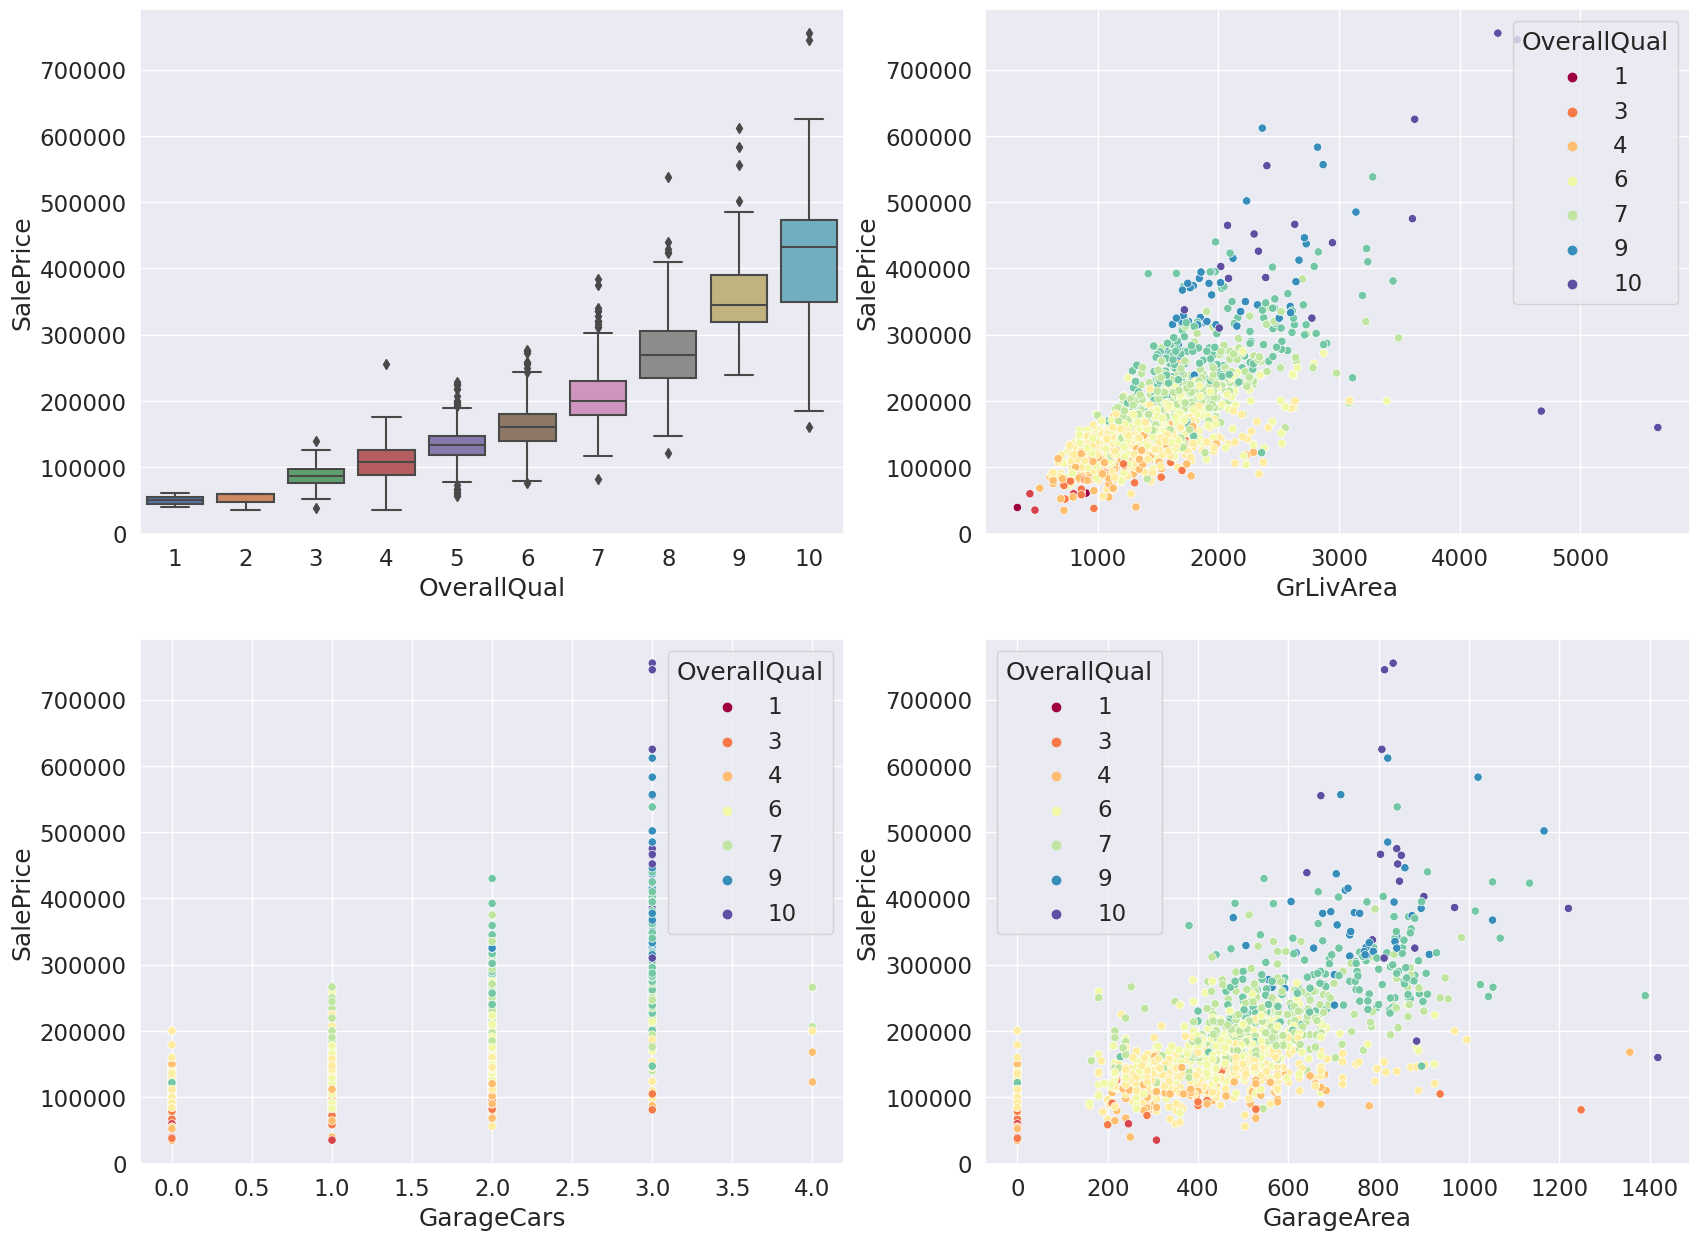

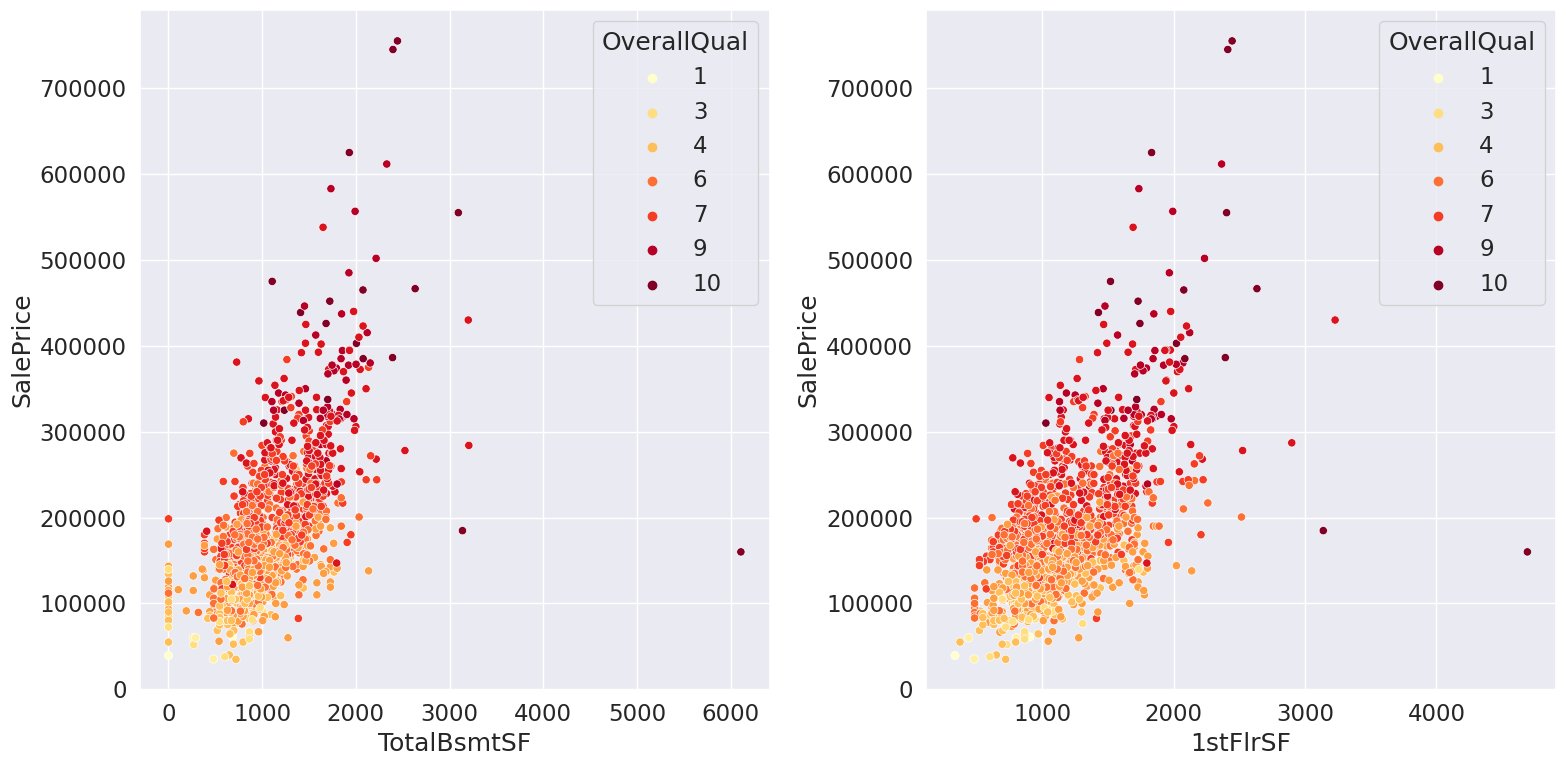

In [116]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

# (Corr= 0.817185) Box plot overallqual/salePrice
fig1 = fig.add_subplot(221); sns.boxplot(x='OverallQual', y='SalePrice', data=train[['SalePrice', 'OverallQual']])

# (Corr= 0.700927) GrLivArea vs SalePrice plot
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = train.GrLivArea, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

# (Corr= 0.680625) GarageCars vs SalePrice plot
fig3 = fig.add_subplot(223); 
sns.scatterplot(x = train.GarageCars, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

# (Corr= 0.650888) GarageArea vs SalePrice plot
fig4 = fig.add_subplot(224); 
sns.scatterplot(x = train.GarageArea, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

fig5 = plt.figure(figsize=(16, 8))
fig6 = fig5.add_subplot(121); 
sns.scatterplot(y = train.SalePrice , x = train.TotalBsmtSF, hue=train.OverallQual, palette= 'YlOrRd')

fig7 = fig5.add_subplot(122); 
sns.scatterplot(y = train.SalePrice, x = train['1stFlrSF'], hue=train.OverallQual, palette= 'YlOrRd')

plt.tight_layout(); plt.show()

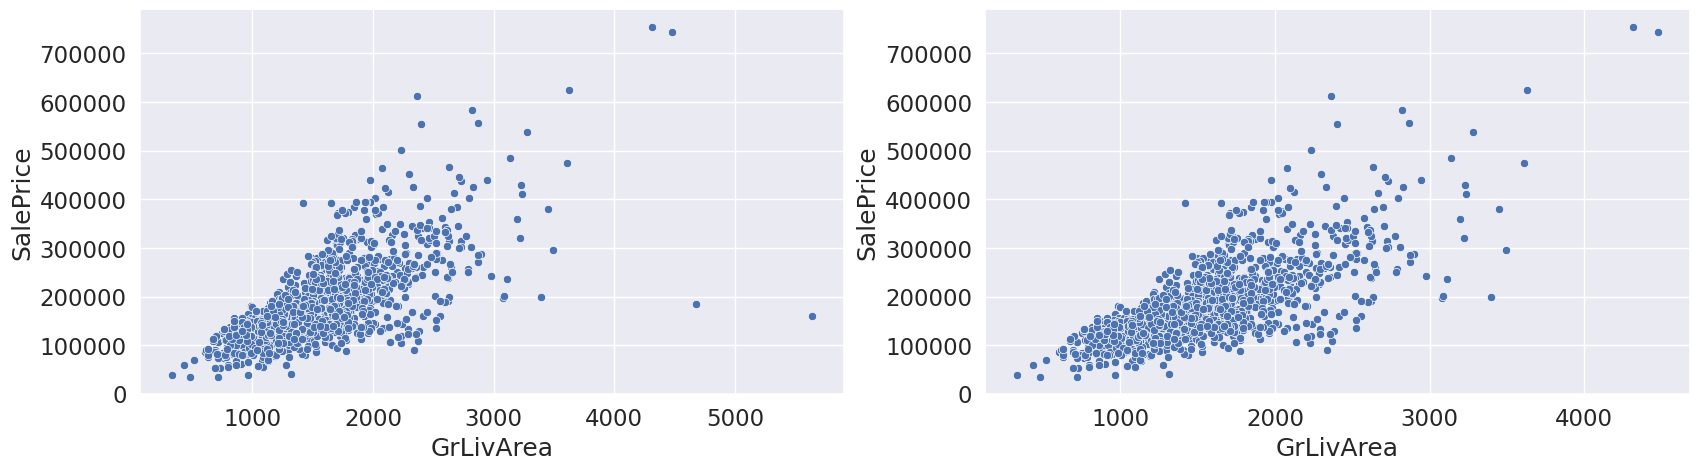

In [117]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
sns.scatterplot(x = train.GrLivArea, y = train.SalePrice, ax = ax)

#Deleting outliers
train = train.drop(train[(train.GrLivArea>4000) & (train.SalePrice<300000)].index)

#Check the graphic again
ax = fig.add_subplot(122)
sns.scatterplot(x =train.GrLivArea, y = train.SalePrice, ax = ax)
plt.show()

### Total Rooms above Ground and Living Area
From a previews experience with Boston data set, you probably main expect to much from the total rooms above ground, as its 'RM' feature (the average number of rooms per dwelling), but here is not the same scenario. Our common sense make to think that live area maybe has some correlation to it and probably we can combine this two features to produce a better predictor. Let's see.
<!-- ![image](https://www.housing.iastate.edu/sites/default/files/imported//images/floorplans/Frederiksen-4BR.gif) -->

                                                                  Outliers: 1


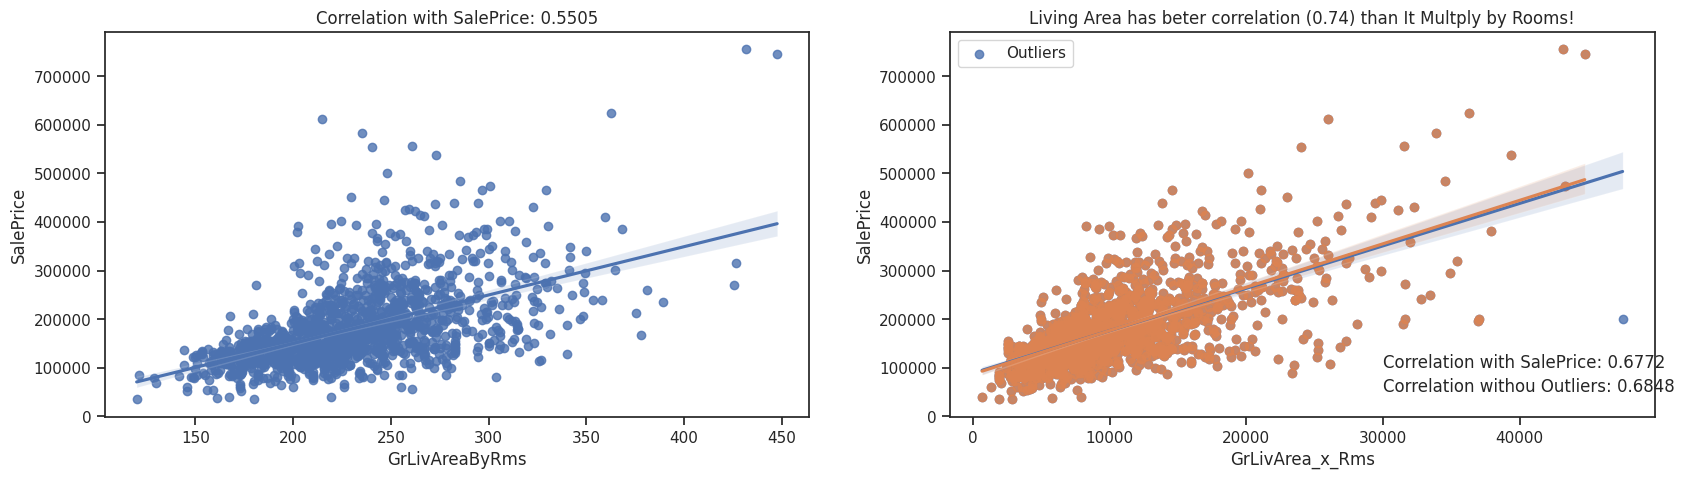

In [118]:
sns.reset_defaults()
sns.set(style="ticks", color_codes=True)

df = train[['SalePrice', 'GrLivArea', 'TotRmsAbvGrd']]
df['GrLivAreaByRms'] = train.GrLivArea/train.TotRmsAbvGrd
df['GrLivArea_x_Rms'] = train.GrLivArea*train.TotRmsAbvGrd
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='GrLivAreaByRms', y='SalePrice', data=df);
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.GrLivAreaByRms.corr(df['SalePrice'])))
fig2 = fig.add_subplot(122); sns.regplot(x='GrLivArea_x_Rms', y='SalePrice', data=df); plt.legend(['Outliers'])
plt.text(x=30000, y=100000, s='Correlation with SalePrice: {:1.4f}'.format(df.GrLivArea_x_Rms.corr(df['SalePrice'])))

print('                                                                  Outliers:',(df.GrLivArea_x_Rms>=45000).sum())
df = df.loc[df.GrLivArea_x_Rms<45000]
sns.regplot(x='GrLivArea_x_Rms', y='SalePrice', data=df); 
plt.title('Living Area has beter correlation ({:1.2f}) than It Multply by Rooms!'.format(df.GrLivArea.corr(df.SalePrice)))
plt.text(x=30000, y=50000, s='Correlation withou Outliers: {:1.4f}'.format(df.GrLivArea_x_Rms.corr(df['SalePrice'])))
plt.show()
del df

As we can see, the interaction between the two features did not present a better correlation than that already seen in the living area, include it improves to 0.74 with the cut of the outliers.

On the other hand, the ***multiplication*** not only demonstrated the living area **outliers** already identified, but it still **emphasized another**. If the strategy is to ***drop the TotRmsAbvGrd***, we should also ***exclude this additional outlier***.

In [119]:
train = train[train.GrLivArea * train.TotRmsAbvGrd < 45000]
print('Train observations after remove outliers:',train.shape[0])

Train observations after remove outliers: 1457


### Garage areas and parking
From the boxplot below, we can note that more than 3 parking cars and more than 900 of area are outliers, since a few number of their observations. Although there is a relationship between them, most likely with a smaller number of parking spaces, there may be more garage area for other purposes, reason why the correlation between them is 0.88 and not 1.
<!-- # ![image](https://thumbs.gfycat.com/TangiblePleasingHousefly-size_restricted.gif) -->

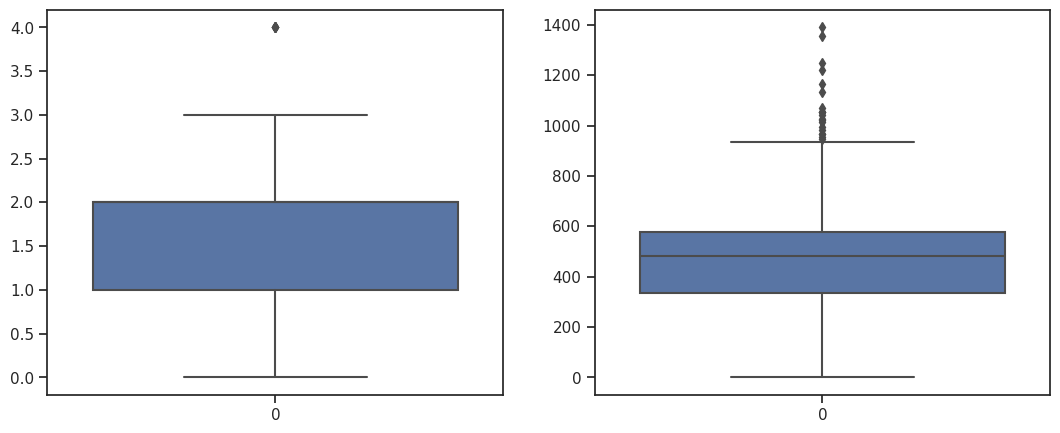

In [123]:
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(131); sns.boxplot(train.GarageCars)
fig2 = fig.add_subplot(132); sns.boxplot(train.GarageArea)
plt.show()

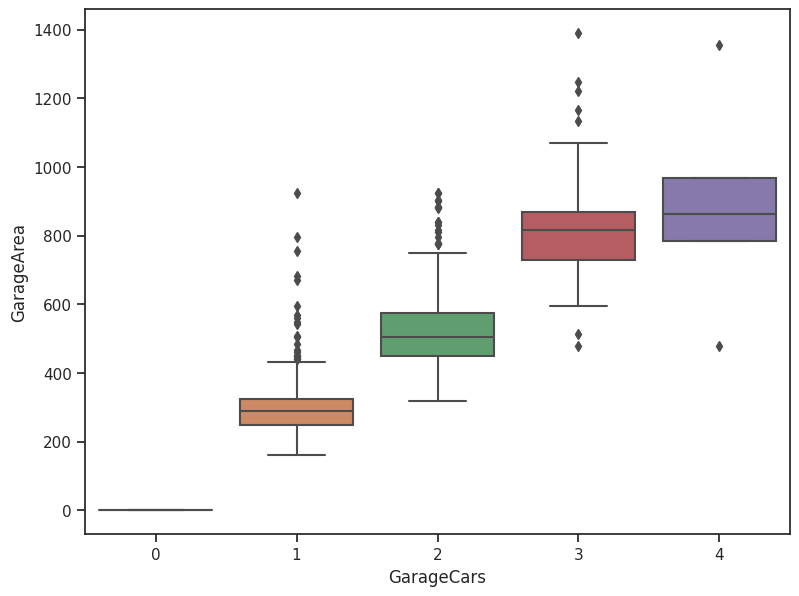

In [128]:
fig = plt.figure(figsize=(20, 15))
fig1 = fig.add_subplot(221)
sns.boxplot(x='GarageCars', y='GarageArea', data=train[['GarageCars', 'GarageArea']])
plt.show()

                                                                 Outliers: 4


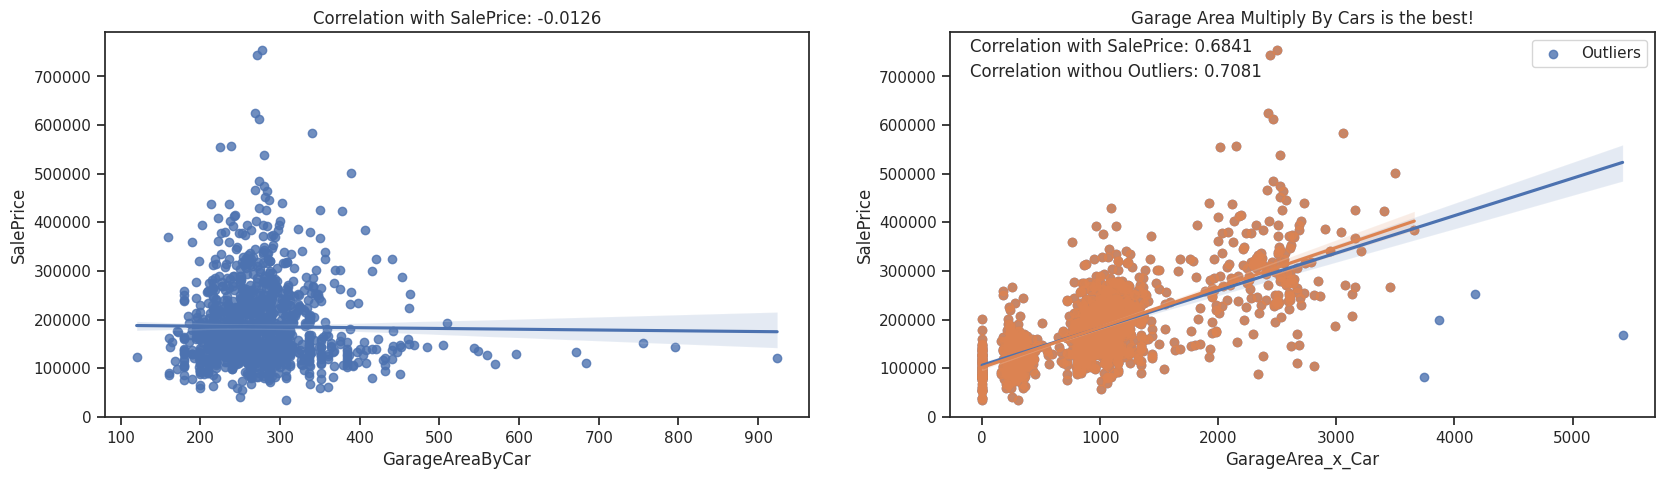

In [129]:
df = train[['SalePrice', 'GarageArea', 'GarageCars']]
df['GarageAreaByCar'] = train.GarageArea/train.GarageCars
df['GarageArea_x_Car'] = train.GarageArea*train.GarageCars

fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='GarageAreaByCar', y='SalePrice', data=df)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.GarageAreaByCar.corr(df['SalePrice'])))

fig2 = fig.add_subplot(122); sns.regplot(x='GarageArea_x_Car', y='SalePrice', data=df); plt.legend(['Outliers'])
plt.text(x=-100, y=750000, s='Correlation with SalePrice: {:6.4f}'.format(df.GarageArea_x_Car.corr(df['SalePrice'])))
print('                                                                 Outliers:',(df.GarageArea_x_Car>=3700).sum())
df = df.loc[df.GarageArea_x_Car<3700]
sns.regplot(x='GarageArea_x_Car', y='SalePrice', data=df); plt.title('Garage Area Multiply By Cars is the best!')
plt.text(x=-100, y=700000, s='Correlation withou Outliers: {:6.4f}'.format(df.GarageArea_x_Car.corr(df['SalePrice'])))
plt.show()
del df

As can be seen the area by car is little useful, but contrary to common sense the multiplication of the area by the number of vacancies yes is. In the division we lose the magnitude and we have to maintain one or another functionality to recover it. With the multiplication we solve the problem of 1 parking space of 10 square feet against another of 10 with 1 square feet each. We could still ***improve the correlation*** by **0.06**, already considering the exclusion of only 4 outliers. 

The identification of the outliers was facilitated, note that before we would have a greater number of outliers, since the respective of each features alone are not coincident.
<!-- ![garage](https://ap.rdcpix.com/517018206/36a0594038b86ae431068cc483092fe6l-m0xd-w480_h480_q80.jpg) -->
So let's continue with the multiplication strategy, remove the two original metrics that have high correlation with each other, and exclude the 4 outliers from the training base.

In [130]:
train = train[train.GarageArea * train.GarageCars < 3700]
print('Total observatiosn after outliers cut:', train.shape[0])

Total observatiosn after outliers cut: 1453


### Total Basement Area Vs 1st Flor Area
In our country it is not common to have Basement, I think we thought it was a little spooky. So I looked a bit more "carefully" at this variable...
<!-- # ![image](https://lparchive.org/Scooby-Doo-Mystery/Update%2002/46-Fusion_2012-08-28_01-59-20-18.png) -->
I noticed that in Ames has a lot of variation, but the predictive effect is very small, so I decided to study its composition with the first floor.

                                                             Outliers: 1


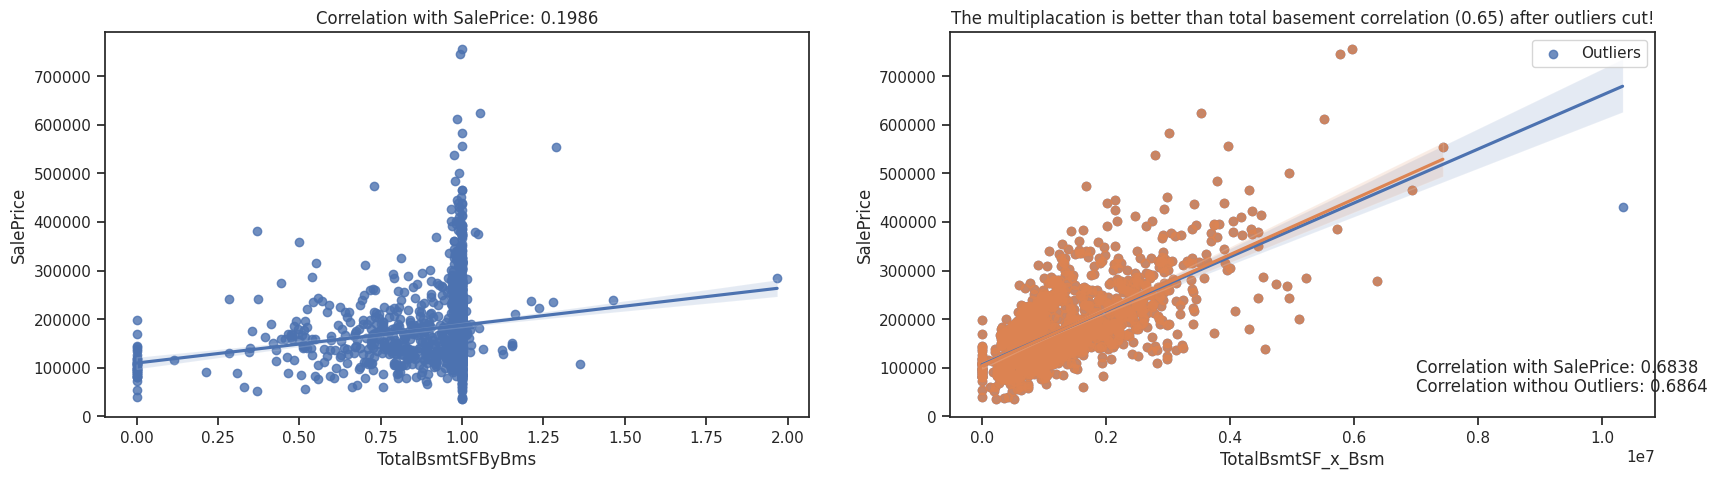

In [131]:
df = train[['SalePrice', 'TotalBsmtSF', '1stFlrSF']]
df['TotalBsmtSFByBms'] = train.TotalBsmtSF/train['1stFlrSF']
df['TotalBsmtSF_x_Bsm'] = train.TotalBsmtSF*train['1stFlrSF']
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='TotalBsmtSFByBms', y='SalePrice', data=df);
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.TotalBsmtSFByBms.corr(df['SalePrice'])))
fig2 = fig.add_subplot(122); sns.regplot(x='TotalBsmtSF_x_Bsm', y='SalePrice', data=df); plt.legend(['Outliers'])
plt.text(x=7e06, y=90000, s='Correlation with SalePrice: {:1.4f}'.format(df.TotalBsmtSF_x_Bsm.corr(df['SalePrice'])))

print('                                                             Outliers:',(df.TotalBsmtSF_x_Bsm>=0.9e07).sum())
df = df.loc[df.TotalBsmtSF_x_Bsm<0.9e07]
sns.regplot(x='TotalBsmtSF_x_Bsm', y='SalePrice', data=df); 
plt.title('The multiplacation is better than total basement correlation ({:1.2f}) after outliers cut!'.format(df.TotalBsmtSF.corr(df.SalePrice)))
plt.text(x=7e06, y=50000, s='Correlation withou Outliers: {:1.4f}'.format(df.TotalBsmtSF_x_Bsm.corr(df['SalePrice'])))
plt.show()
del df

Similar to what we saw in the garage analysis, we again have a better correlation by multiplying the variables, but now we don't have a significant gain with outliers exclusion. So let's continue with the multiplication strategy and remove only the two original metrics that have high correlation with each other.

### Year Built Vs Garage Year Built
Of course when we buy a property the date of its construction makes a lot of difference as it can be a source of great headaches. Depending on the age and conditions there will be need for renovations and very old houses there may be cases where the garage has been built or refit after the house itself.
<!-- # ![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROzLQY3lcdYJimrBS7fHjLE0vhecqf1HTCfBANuDX5_5ZGBv0b) -->
Well, I'd be more worried about the plumbing, the electricity, ... the garage is only for car and trunk, or is it not? Is that so? it will be?

So, let's see the graphs below, and confirm that this two features are highly correlated, but as expect is not easy to find a good substitute by iteration.

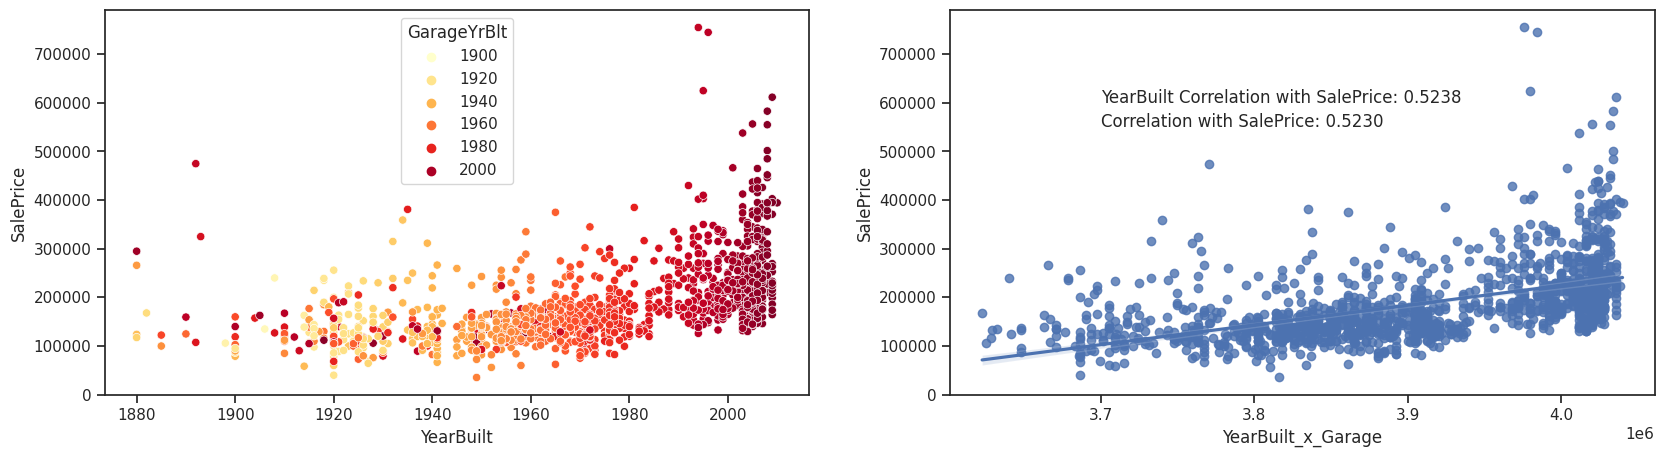

In [133]:
df = train[['SalePrice', 'YearBuilt', 'GarageYrBlt']]
df['YearBuilt_x_Garage'] = train.YearBuilt*train.GarageYrBlt
df['Garage_Newest'] = train.YearBuilt < train.GarageYrBlt

fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.scatterplot(y = df.SalePrice, x = df.YearBuilt, hue=df.GarageYrBlt, palette= 'YlOrRd')
fig2 = fig.add_subplot(122); sns.regplot(x='YearBuilt_x_Garage', y='SalePrice', data=df); 
plt.text(x=3700000, y=600000, s='YearBuilt Correlation with SalePrice: {:1.4f}'.format(df.YearBuilt.corr(df['SalePrice'])))
plt.text(x=3700000, y=550000, s='Correlation with SalePrice: {:1.4f}'.format(df.YearBuilt_x_Garage.corr(df['SalePrice'])))
plt.show()

However, by making the year of construction of the garage an indicator of whether it is newer, it becomes easiest to identify a pattern of separation. 

And more, note that we have a rising price due to the lower age. Maybe the old cars had the garage would only be for themselves...
<!-- ![image](https://www.corsia.us/wp-content/uploads/2016/05/cars-period-1909-taft-white-steam-car-1-800x533-538x218.jpg) -->
..., or put it in the barn. Today we must have other more usable uses for garage, right...?
<!-- ![image](http://bonjourmini.com/wp-content/uploads/2018/05/garage-man-cave-how-to-create-a-man-cave-garage-more-best-flooring-for-garage-man-cave.jpg) -->

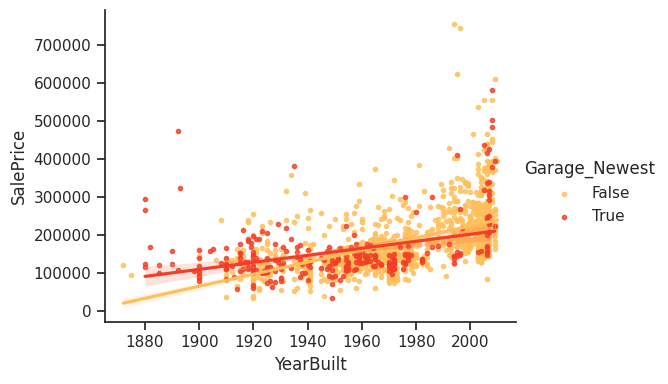

In [134]:
sns.lmplot(y = 'SalePrice', x = 'YearBuilt', data=df, markers='.', 
           aspect=1.4, height=4, hue= 'Garage_Newest', palette= 'YlOrRd')
plt.show();  
del df

But note that although we have a rising price the newer the house, the growth rate is very smooth, even with the rate gain with a newer garage. This makes sense, given that the prices of these regressors are meeting with the mean price of each year.

### Bathrooms Features
It's time to take a break and go to the toilet, to our luck there are 4 bathroom variables in our data set. FullBath has the largest correlation with SalePrice between than. The others individually, these features are not very important. 


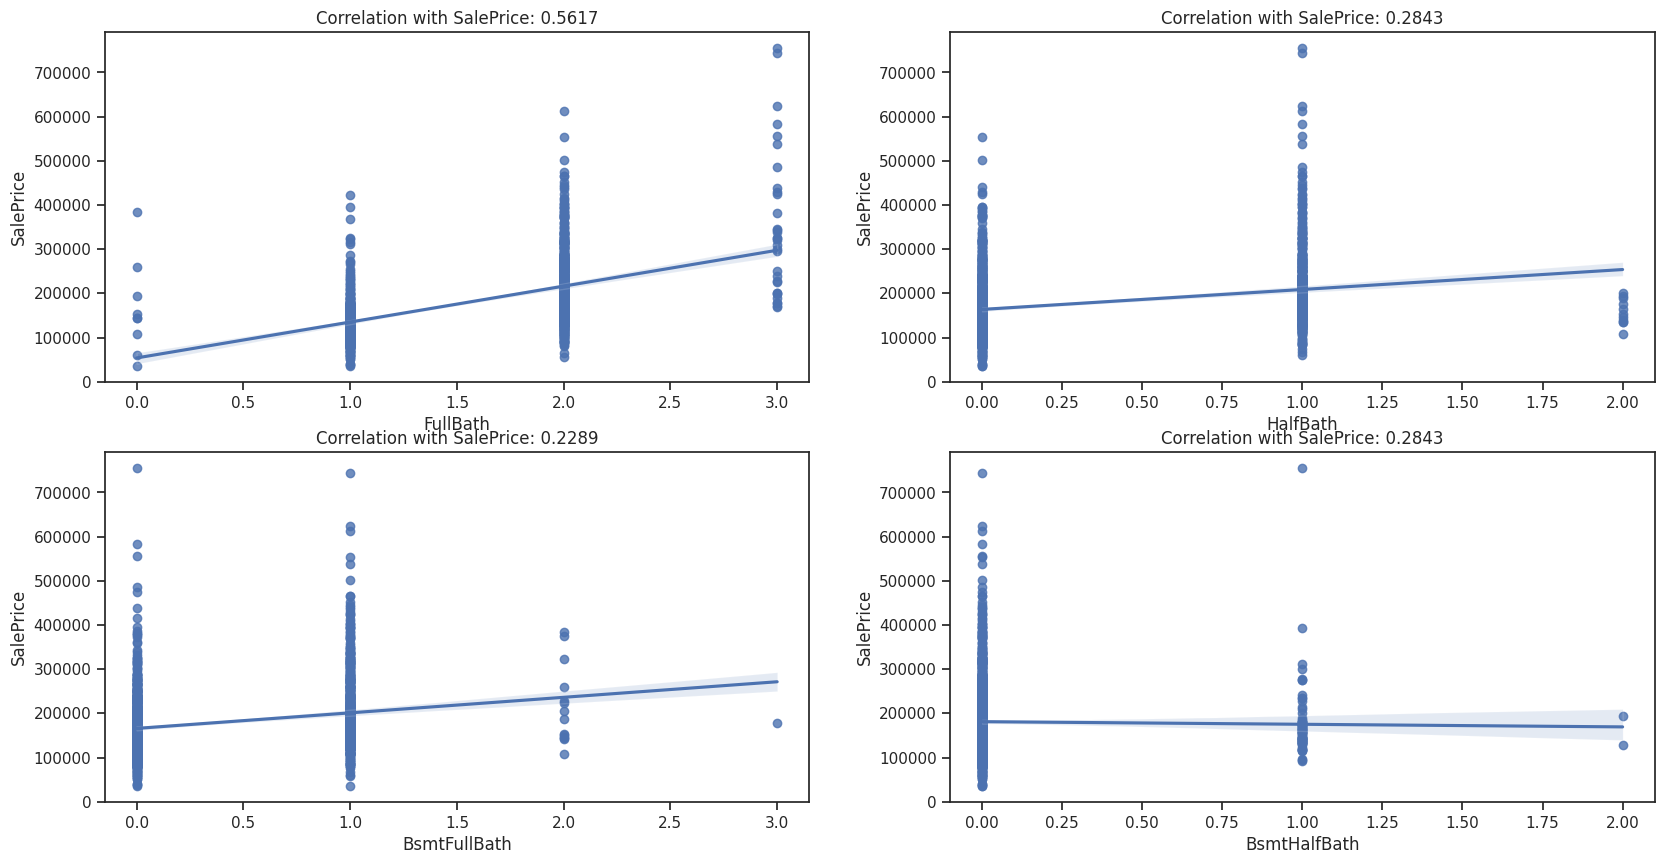

In [135]:
fig = plt.figure(figsize=(20,10))
fig1 = fig.add_subplot(221); sns.regplot(x='FullBath', y='SalePrice', data=train)
plt.title('Correlation with SalePrice: {:6.4f}'.format(train.FullBath.corr(train['SalePrice'])))

fig2 = fig.add_subplot(222); sns.regplot(x='HalfBath', y='SalePrice', data=train);
plt.title('Correlation with SalePrice: {:6.4f}'.format(train.HalfBath.corr(train['SalePrice'])))

fig3 = fig.add_subplot(223); sns.regplot(x='BsmtFullBath', y='SalePrice', data=train)
plt.title('Correlation with SalePrice: {:6.4f}'.format(train.BsmtFullBath.corr(train['SalePrice'])))

fig4 = fig.add_subplot(224); sns.regplot(x='BsmtHalfBath', y='SalePrice', data=train);
plt.title('Correlation with SalePrice: {:6.4f}'.format(train.HalfBath.corr(train['SalePrice'])))

plt.show()

However, I assume that I if I add them up into one predictor, this predictor is likely to become a strong one. A half-bath, also known as a powder room or guest bath, has only two of the four main bathroom components-typically a toilet and sink. Consequently, I will also count the half bathrooms as half.

In [136]:
df = train[['SalePrice', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']]
df['TotBathrooms'] = df.FullBath + (df.HalfBath*0.5) + df.BsmtFullBath + (df.BsmtHalfBath*0.5)

                                                                 Outliers: 2


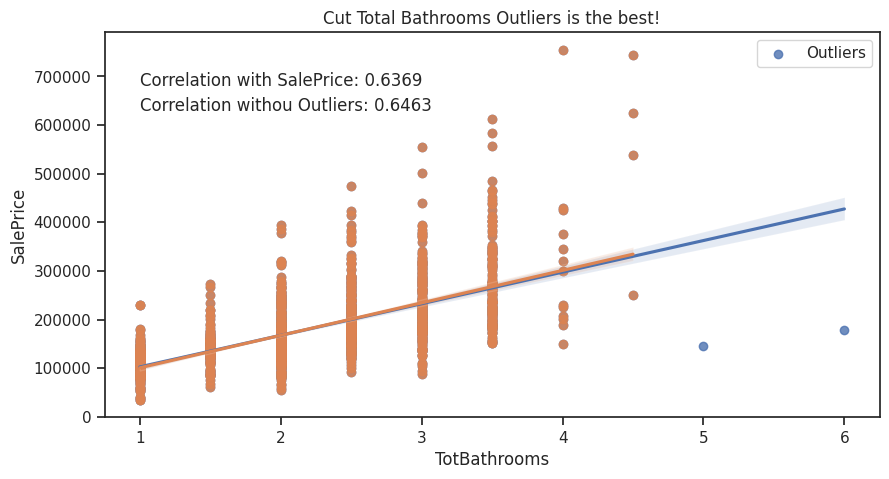

In [137]:
fig = plt.figure(figsize=(10,5))
sns.regplot(x='TotBathrooms', y='SalePrice', data=df); plt.legend(['Outliers'])
plt.text(x=1, y=680000, s='Correlation with SalePrice: {:6.4f}'.format(df.TotBathrooms.corr(df['SalePrice'])))
print('                                                                 Outliers:',(df.TotBathrooms>=5).sum())
df = df.loc[df.TotBathrooms<5]
sns.regplot(x='TotBathrooms', y='SalePrice', data=df); plt.title('Cut Total Bathrooms Outliers is the best!')
plt.text(x=1, y=630000, s='Correlation withou Outliers: {:6.4f}'.format(df.TotBathrooms.corr(df['SalePrice'])))
plt.show()

So, with our best predictor, we can cut only two outliers, use it and substitute all others bath features with a existence indicator.

In [138]:
train = train[(train.FullBath + (train.HalfBath*0.5) + train.BsmtFullBath + (train.BsmtHalfBath*0.5))<5]
print('Data observations after outliers deletion:', train.shape[0])

Data observations after outliers deletion: 1451


### Reviwe Porch Features:
The porch is where many people feel more comfortable to watch life go by, or you prefer the sofa in front of the TV, I think there are people that solved this to the family don't can fighting about this...
<!-- ![image](http://ginormasource.com/humor/wp-content/uploads/2011/10/redneck-porch-swing.jpg) -->
... this idea should make a house worth more, should not it?

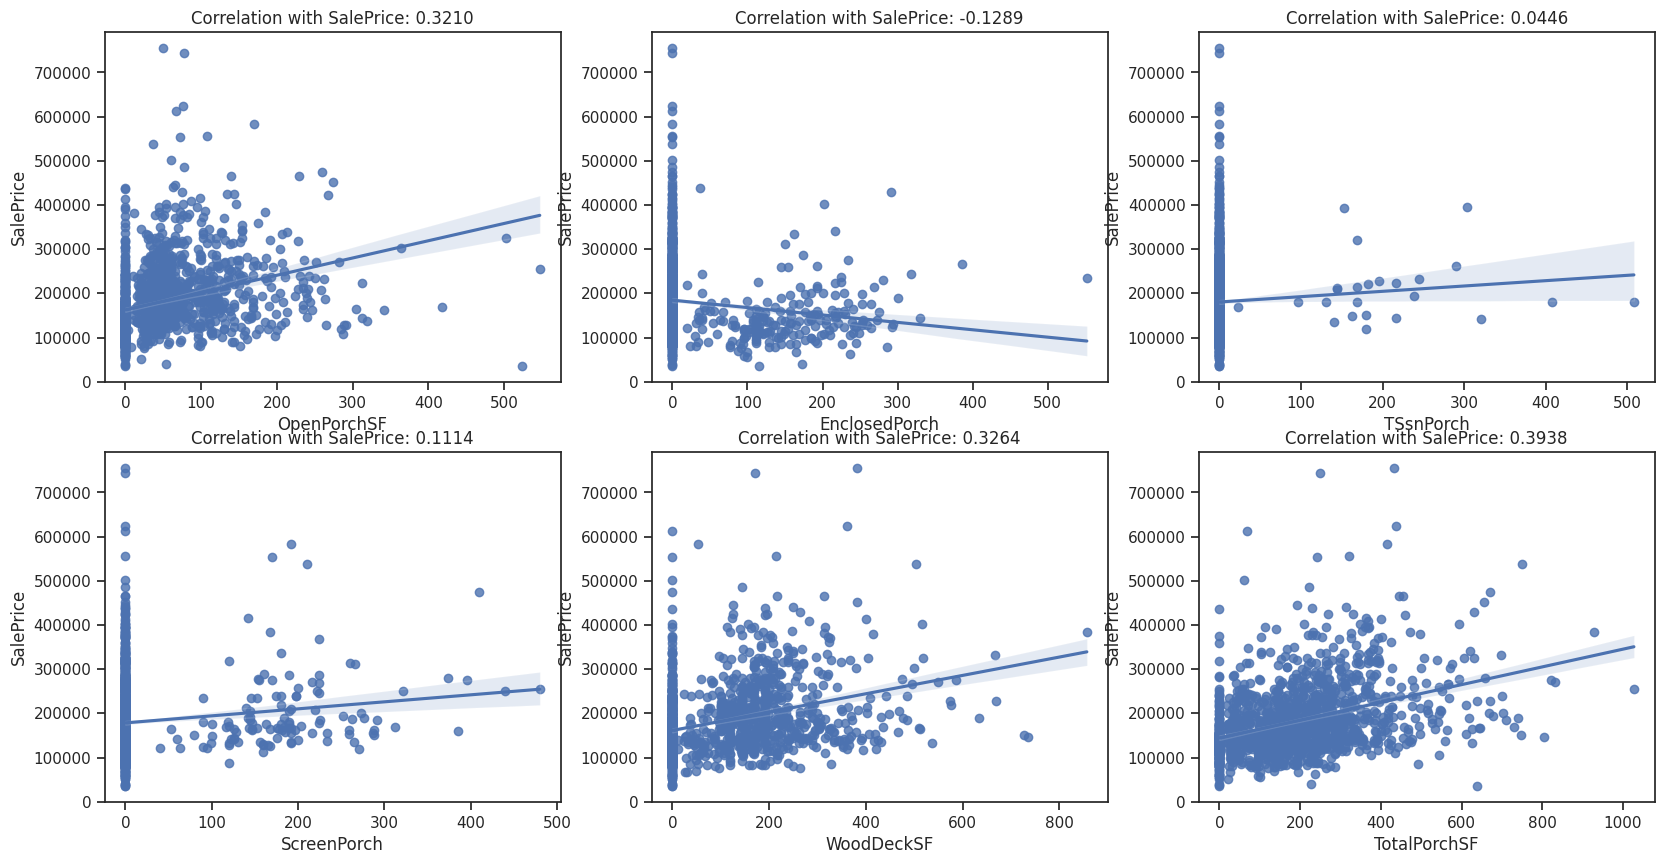

In [139]:
def PorchPlots():
    fig = plt.figure(figsize=(20,10))
    fig1 = fig.add_subplot(231); sns.regplot(x='OpenPorchSF', y='SalePrice', data=df)
    plt.title('Correlation with SalePrice: {:6.4f}'.format(df.OpenPorchSF.corr(df['SalePrice'])))

    fig2 = fig.add_subplot(232); sns.regplot(x='EnclosedPorch', y='SalePrice', data=df);
    plt.title('Correlation with SalePrice: {:6.4f}'.format(df.EnclosedPorch.corr(df['SalePrice'])))

    fig3 = fig.add_subplot(233); sns.regplot(x='TSsnPorch', y='SalePrice', data=df)
    plt.title('Correlation with SalePrice: {:6.4f}'.format(df.TSsnPorch.corr(df['SalePrice'])))

    fig4 = fig.add_subplot(234); sns.regplot(x='ScreenPorch', y='SalePrice', data=df);
    plt.title('Correlation with SalePrice: {:6.4f}'.format(df.ScreenPorch.corr(df['SalePrice'])))

    fig5 = fig.add_subplot(235); sns.regplot(x='WoodDeckSF', y='SalePrice', data=df);
    plt.title('Correlation with SalePrice: {:6.4f}'.format(df.WoodDeckSF.corr(df['SalePrice'])))

    fig6 = fig.add_subplot(236); sns.regplot(x='TotalPorchSF', y='SalePrice', data=df);
    plt.title('Correlation with SalePrice: {:6.4f}'.format(df.TotalPorchSF.corr(df['SalePrice'])))

    plt.show()

df = train[['SalePrice', 'OpenPorchSF', 'EnclosedPorch', 'TSsnPorch', 'ScreenPorch', 'WoodDeckSF']]
df['TotalPorchSF'] = df.OpenPorchSF + df.EnclosedPorch + df.TSsnPorch + df.ScreenPorch + df.WoodDeckSF
#df = df[df.TotalPorchSF<=600] # A possible outlier cut!
PorchPlots()

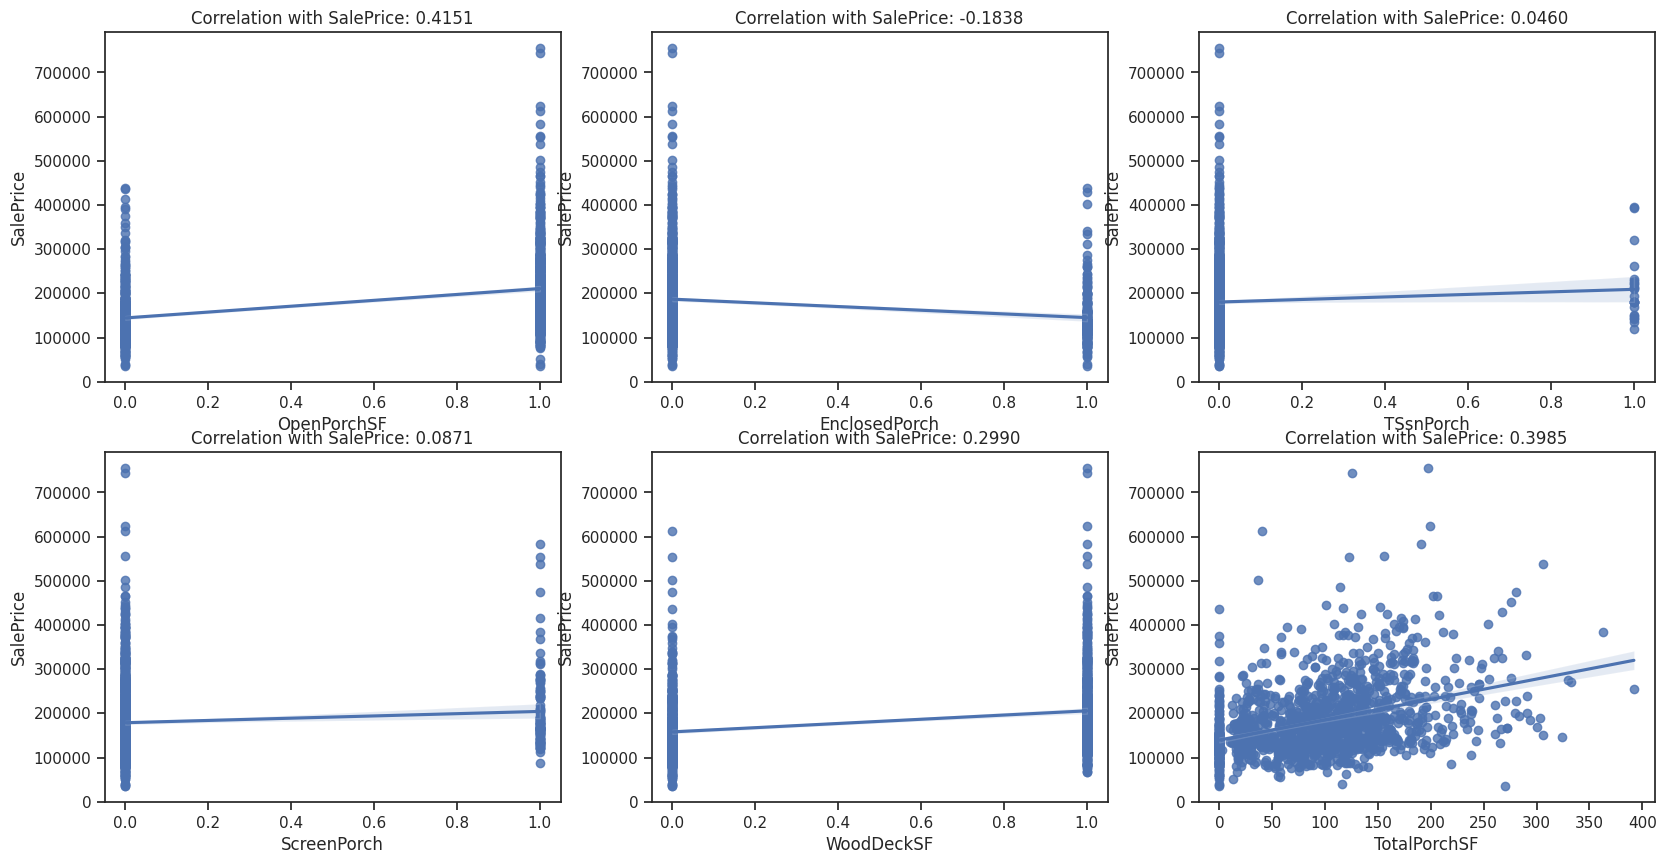

In [140]:
df.OpenPorchSF = df.OpenPorchSF > 0
df.EnclosedPorch =  df.EnclosedPorch > 0
df.TSsnPorch = df.TSsnPorch > 0
df.ScreenPorch = df.ScreenPorch > 0
df.WoodDeckSF = df.WoodDeckSF > 0
df.TotalPorchSF = np.sqrt(df.TotalPorchSF) * (np.log1p(np.sqrt(df.TotalPorchSF))**2)

PorchPlots()

As we have seen, porch features have low correlation with price, and by the graphics we see all most has low bas and high variance, being a high risk to end complex models and fall into ouverfit.

### Slope of property and Lot area
Everyone knows that the size of the lot matters, but has anyone seen any ad talking about the slope?

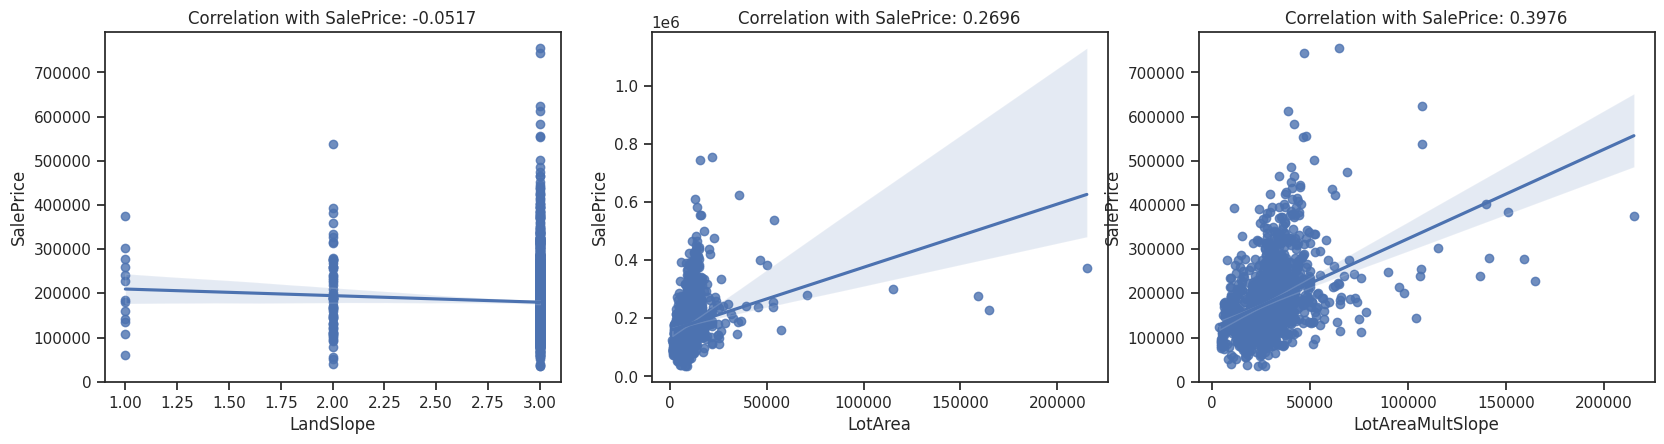

In [141]:
# LandSlope: Slope of property
LandSlope = {}
LandSlope['Gtl'] = 3 #'Gentle slope'
LandSlope['Mod'] = 2 #'Moderate Slope'
LandSlope['Sev'] = 1 #'Severe Slope'

df = train[['SalePrice', 'LandSlope', 'LotArea']]
df.LandSlope = df.LandSlope.map(LandSlope)
df['LotAreaMultSlope'] = (df.LotArea * df.LandSlope)

fig = plt.figure(figsize=(20,10))
fig1 = fig.add_subplot(231); sns.regplot(x='LandSlope', y='SalePrice', data=df)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.LandSlope.corr(df['SalePrice'])))

fig2 = fig.add_subplot(232); sns.regplot(x='LotArea', y='SalePrice', data=df);
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.LotArea.corr(df['SalePrice'])))

fig3 = fig.add_subplot(233); sns.regplot(x='LotAreaMultSlope', y='SalePrice', data=df)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.LotAreaMultSlope.corr(df['SalePrice'])))
plt.show()

It is interesting to note that the slope has a low correlation, but as an expected negative. On the other hand, the lot size does not present such a significant correlation, contrary to the interaction between these two characteristics, which is better and also allow us to identify some outliers. Let's take a look at the effect of removing the outliers.

     SalePrice  LandSlope  LotArea  LotAreaMultSlope
249     277000          1   159000            159000
313     375000          1   215245            215245
335     228950          1   164660            164660


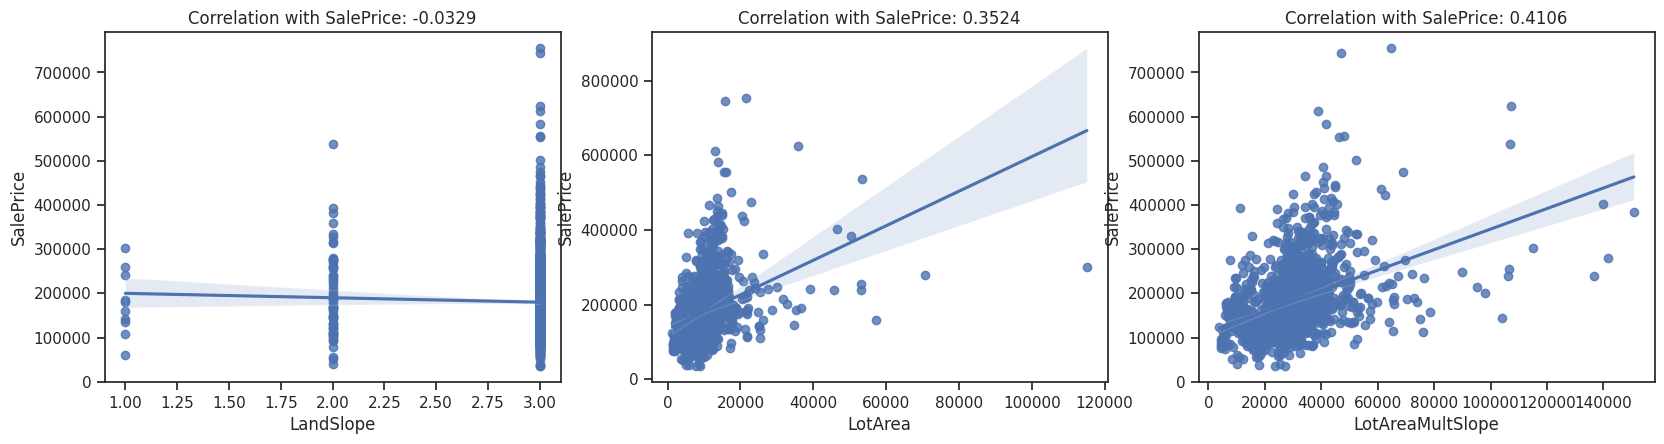

In [142]:
print(df[df.LotArea>155000])
df = df[df.LotArea<155000]
fig = plt.figure(figsize=(20,10))
fig1 = fig.add_subplot(234); sns.regplot(x='LandSlope', y='SalePrice', data=df)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.LandSlope.corr(df['SalePrice'])))

fig2 = fig.add_subplot(235); sns.regplot(x='LotArea', y='SalePrice', data=df);
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.LotArea.corr(df['SalePrice'])))

fig3 = fig.add_subplot(236); sns.regplot(x='LotAreaMultSlope', y='SalePrice', data=df)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.LotAreaMultSlope.corr(df['SalePrice'])))
plt.show()

### Neighborhood
Let's watch how much the neighborhood may be influencing the price.

In [154]:
figa = plt.figure(figsize=(20, 5))
g = train.Neighborhood.value_counts().plot(kind='bar', title='Number of Sales by Neighborhood')

figb = plt.figure(figsize=(20, 5))
plt.tight_layout()
df = train[['SalePrice', 'YrSold', 'Neighborhood']]

df['TotalArea'] = (train.TotalBsmtSF.fillna(0) + train.WoodDeckSF.fillna(0) + train.GrLivArea.fillna(0) + 
                   train.LotArea.fillna(0) + train.MasVnrArea.fillna(0) + train.GarageArea.fillna(0) + 
                   train.OpenPorchSF.fillna(0) + train.TSsnPorch.fillna(0) + train.ScreenPorch.fillna(0) + 
                   train.EnclosedPorch.fillna(0) + train.PoolArea.fillna(0) )
 
df = df.groupby(by=['Neighborhood', 'YrSold'], as_index=False).sum()
Neig = df[['SalePrice', 'TotalArea', 'Neighborhood']].groupby(by='Neighborhood', as_index=False).sum()
Neig['NeigPrice'] = Neig.SalePrice / Neig.TotalArea
Neig.drop(['TotalArea', 'SalePrice'], axis=1, inplace=True)
g = Neig.groupby('Neighborhood').NeigPrice.sum().sort_values(ascending = False).\
    plot(kind='bar', title='Mean Sales Prices per Area (Constructed + Lot) by Neighborhood')
Neig = Neig.groupby(by='Neighborhood', as_index=True).NeigPrice.sum().sort_values(ascending = False)

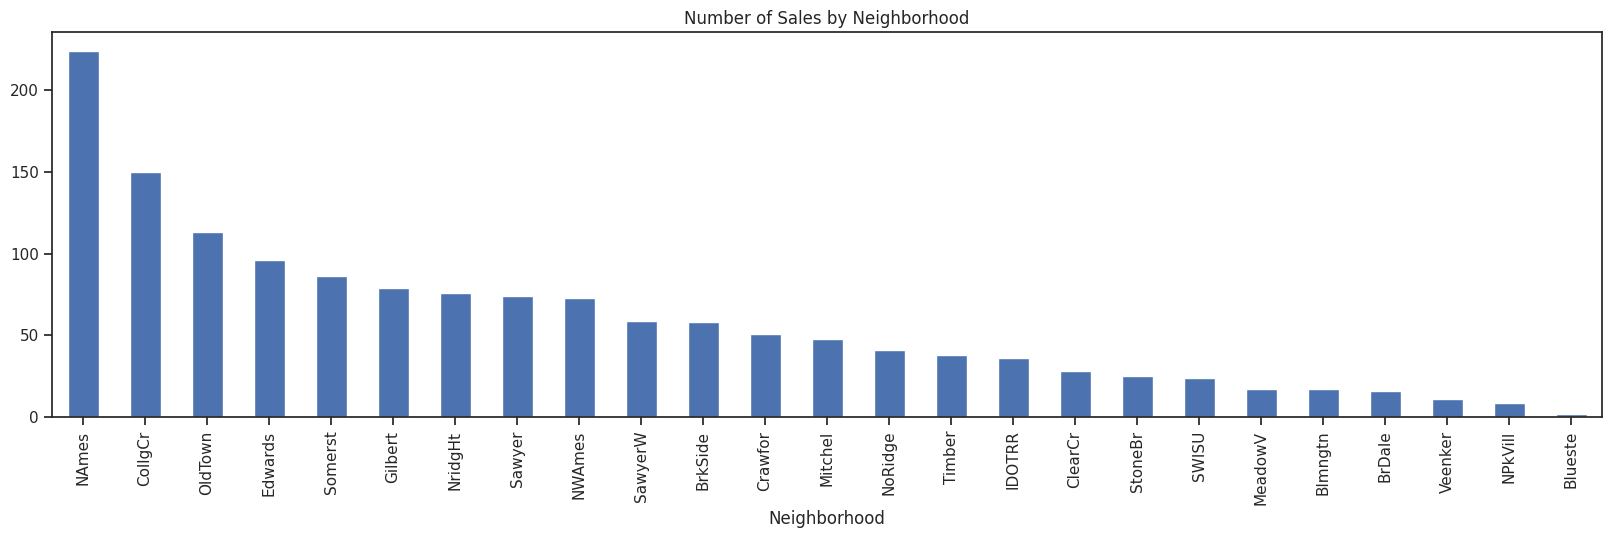

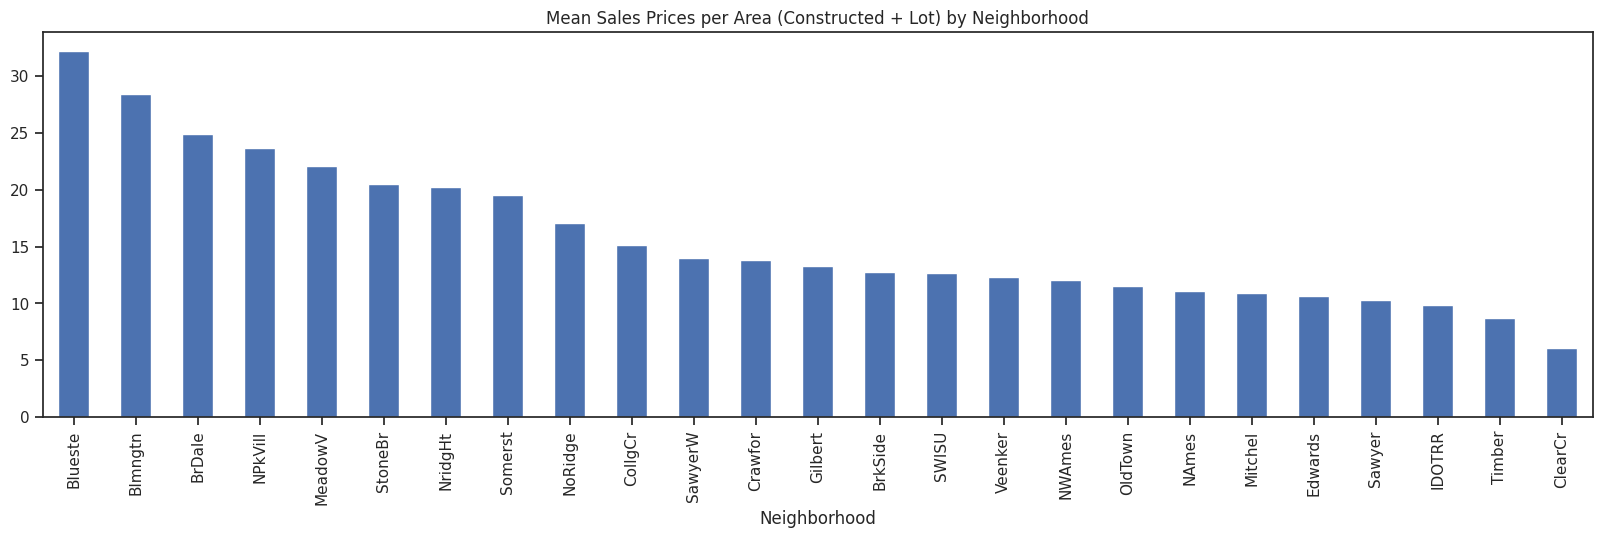

In [155]:
plt.show()

As we can see prices are affected by the neighborhood, yes, if more similar more they attract. But we will delve a little and see how the year and month of the sale also has great influence on the price variation and confirm the seasonality.

                              Yearly Sales Prices per Area (Constructed + Lot) by Neighborhood:


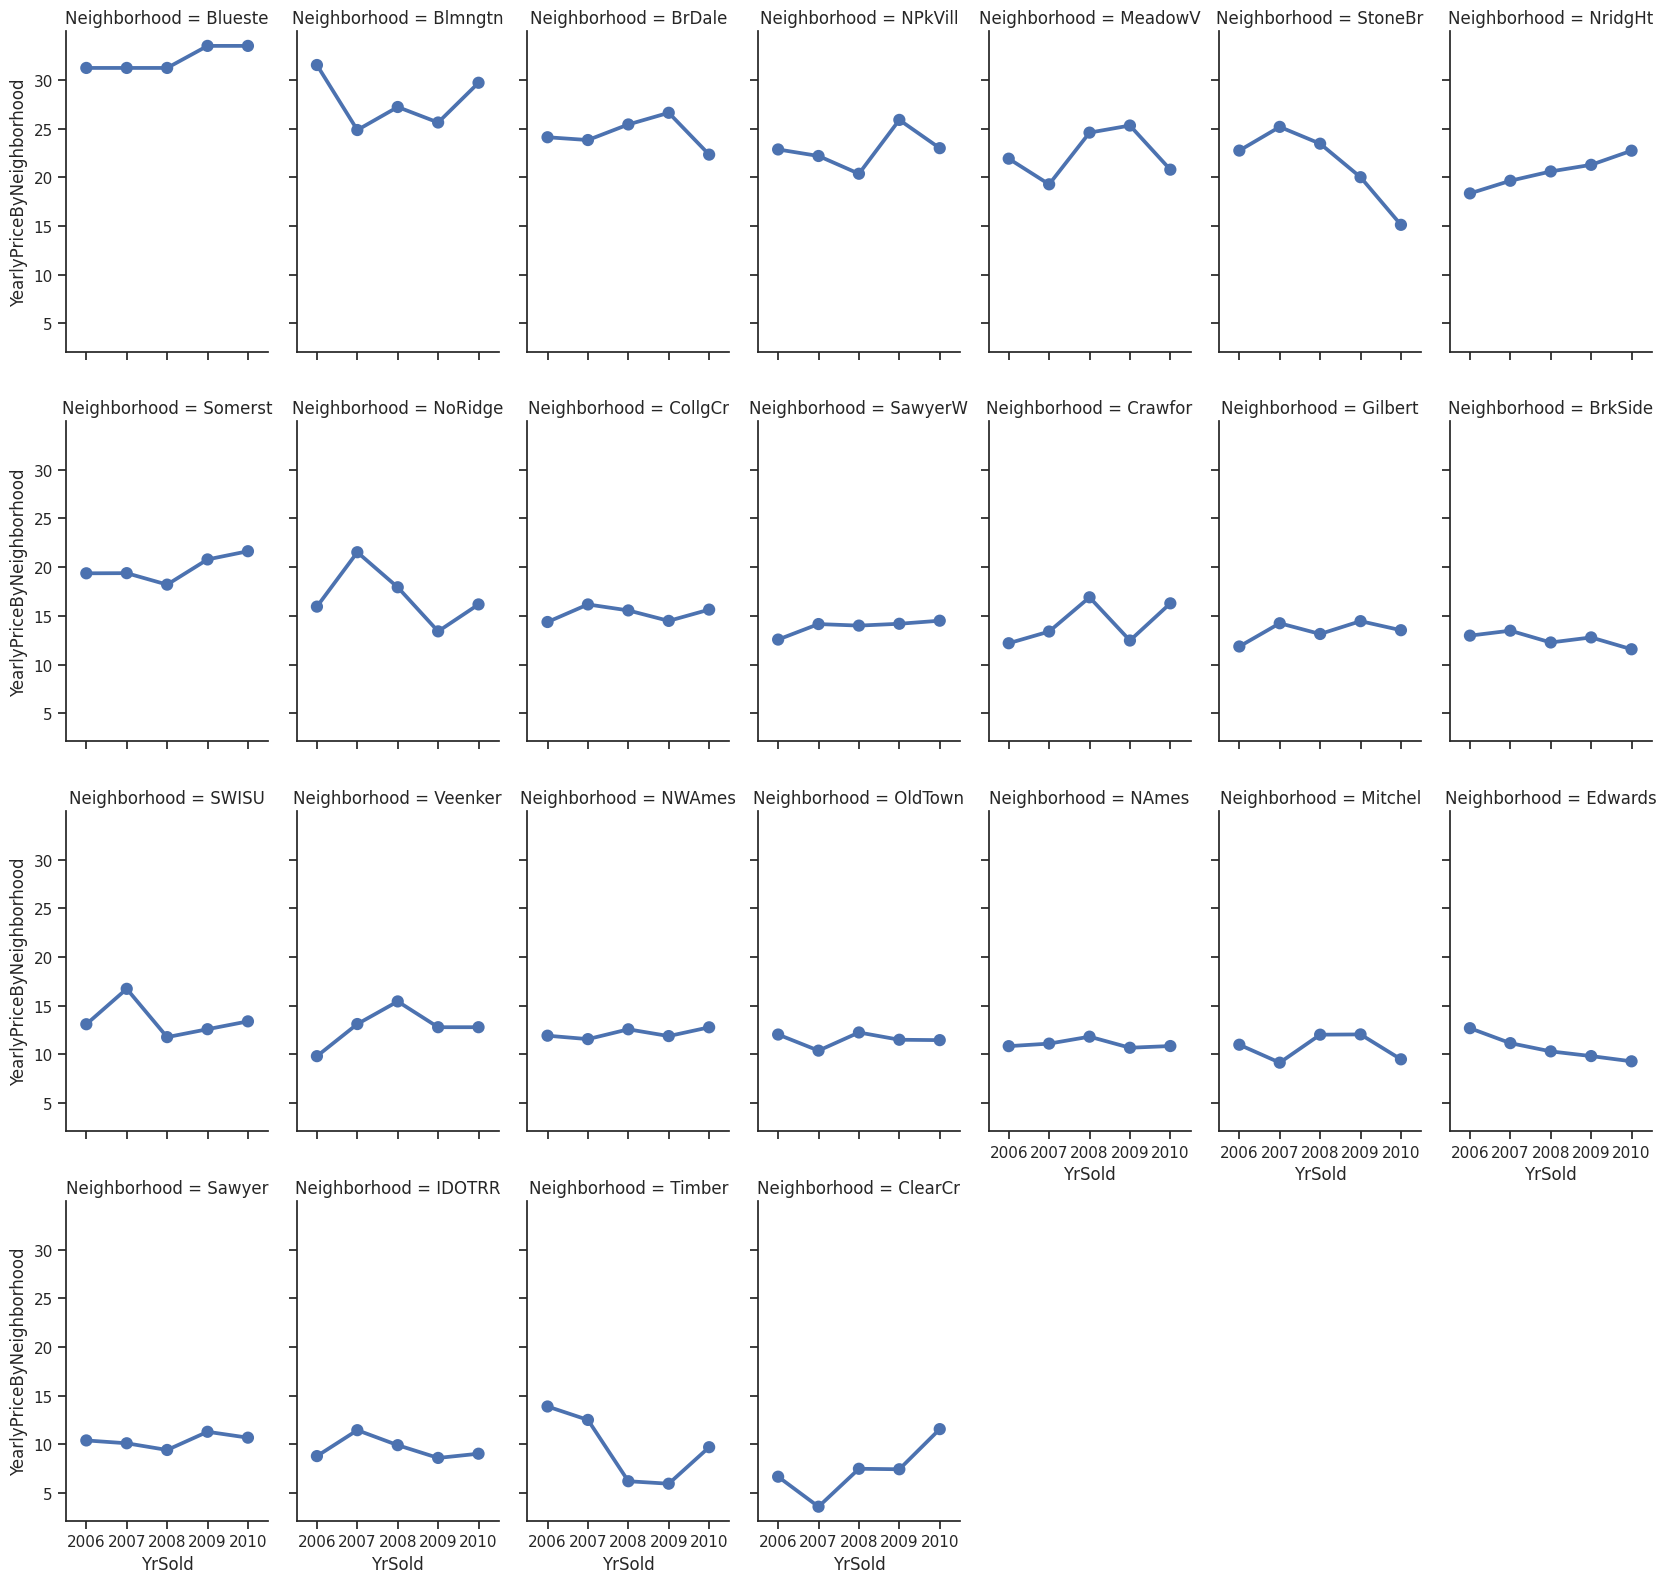

In [156]:
# Yearly Sales Price per Area (Constructed + Lot) by Neighborhood:
df['HistPriceByNeighborhood'] = df.SalePrice / df.TotalArea
df.drop(['TotalArea', 'SalePrice'], axis=1, inplace=True)

# Fill the gaps
df = pd.concat([df, pd.DataFrame([['NPkVill', 2006, df.HistPriceByNeighborhood[df.Neighborhood=='NPkVill'].mean()]], 
                                 columns=df.columns)], ignore_index=True)

df = pd.concat([df, pd.DataFrame([['Veenker', 2009, df.HistPriceByNeighborhood[df.Neighborhood=='Veenker'].mean()]], 
                                 columns=df.columns)], ignore_index=True)

df = pd.concat([df, pd.DataFrame([['Veenker', 2010, df.HistPriceByNeighborhood[df.Neighborhood=='Veenker'].mean()]], 
                                 columns=df.columns)], ignore_index=True)

df = pd.concat([df, pd.DataFrame([['Blueste', 2006, df.HistPriceByNeighborhood[df.Neighborhood=='Blueste'].min()]], 
                                 columns=df.columns)], ignore_index=True)

df = pd.concat([df, pd.DataFrame([['Blueste', 2007, df.HistPriceByNeighborhood[df.Neighborhood=='Blueste'].min()]], 
                                 columns=df.columns)], ignore_index=True)

df = pd.concat([df, pd.DataFrame([['Blueste', 2010, df.HistPriceByNeighborhood[df.Neighborhood=='Blueste'].max()]], 
                                 columns=df.columns)], ignore_index=True)

# Reserve data to merge with all data sets of train and test data
YearlyPrice = df
YearlyPrice.columns = ['Neighborhood', 'YrSold', 'YearlyPriceByNeighborhood']

print('                              Yearly Sales Prices per Area (Constructed + Lot) by Neighborhood:')
g = sns.catplot(y='YearlyPriceByNeighborhood', x='YrSold', col='Neighborhood', data=YearlyPrice, 
                kind='point', aspect=.6, col_wrap=7, height=4, col_order=Neig.index)

plt.show()

                                 Monthly Sales Prices per Area (Constructed + Lot) by Neighborhood:


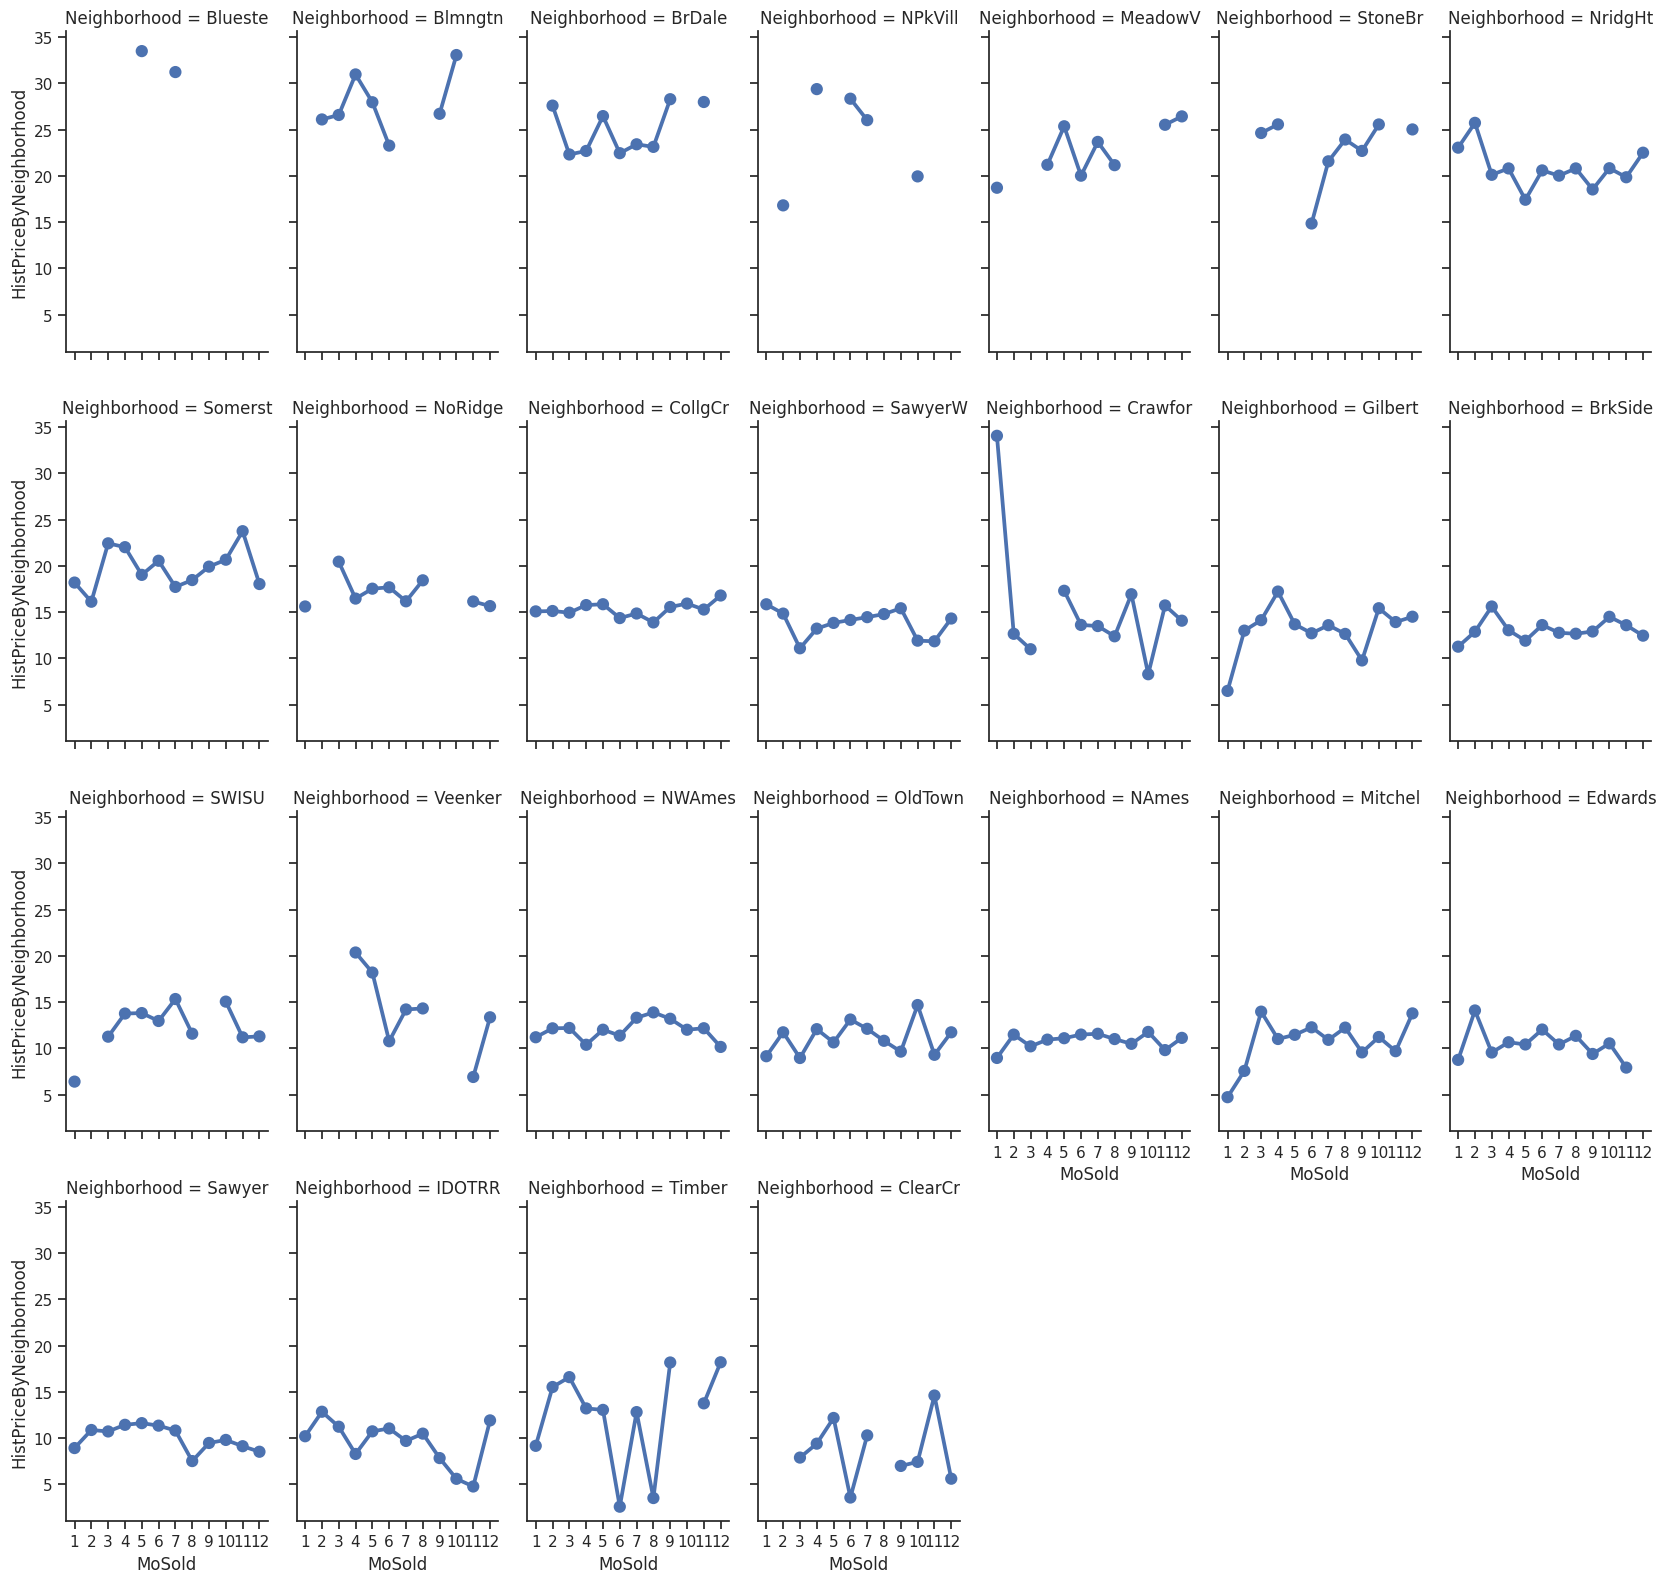

In [157]:
# Monthly Sales Prices per Area (Constructed + Lot) by Neighborhood:
df = train[['SalePrice', 'MoSold', 'Neighborhood']]

df['TotalArea'] = (train.TotalBsmtSF.fillna(0) + train.WoodDeckSF.fillna(0) + train.GrLivArea.fillna(0) + 
                   train.LotArea.fillna(0) + train.MasVnrArea.fillna(0) + train.GarageArea.fillna(0) + 
                   train.OpenPorchSF.fillna(0) + train.TSsnPorch.fillna(0) + train.ScreenPorch.fillna(0) + 
                   train.EnclosedPorch.fillna(0) + train.PoolArea.fillna(0) )

df = df.groupby(by=['Neighborhood', 'MoSold'], as_index=False).sum()
df['HistPriceByNeighborhood'] = df.SalePrice / df.TotalArea
df.drop(['TotalArea', 'SalePrice'], axis=1, inplace=True)

print('                                 Monthly Sales Prices per Area (Constructed + Lot) by Neighborhood:')
g = sns.catplot(y= 'HistPriceByNeighborhood', x = 'MoSold', col='Neighborhood', data=df, 
               kind="point", aspect=.6, col_wrap=7, height=4, col_order=Neig.index )
plt.show()

In [158]:
# Outliers from Crawfor Neighborhood
df = train[train.Neighborhood=='Crawfor'][['SalePrice', 'MoSold', 'Neighborhood']]

df['TotalArea'] = (train.TotalBsmtSF.fillna(0) + train.WoodDeckSF.fillna(0) + train.GrLivArea.fillna(0) + 
                   train.LotArea.fillna(0) + train.MasVnrArea.fillna(0) + train.GarageArea.fillna(0) + 
                   train.OpenPorchSF.fillna(0) + train.TSsnPorch.fillna(0) + train.ScreenPorch.fillna(0) + 
                   train.EnclosedPorch.fillna(0) + train.PoolArea.fillna(0) )

df['HistPriceByNeighborhood'] = df.SalePrice / df.TotalArea
df[df.HistPriceByNeighborhood>30]

,SalePrice,MoSold,Neighborhood,TotalArea,HistPriceByNeighborhood
1181,392500,11,Crawfor,9875.000,39.747
1405,275000,1,Crawfor,8074.000,34.060


In [159]:
train = train.loc[~(train.SalePrice==392500.0)]
train = train.loc[~((train.SalePrice==275000.0) & (train.Neighborhood=='Crawfor'))]
print('Data observations after outliers deletion:', train.shape[0])

Data observations after outliers deletion: 1449


                         Monthly Hist Sales Prices per Area (Construct + Lot) by Neighborhood:


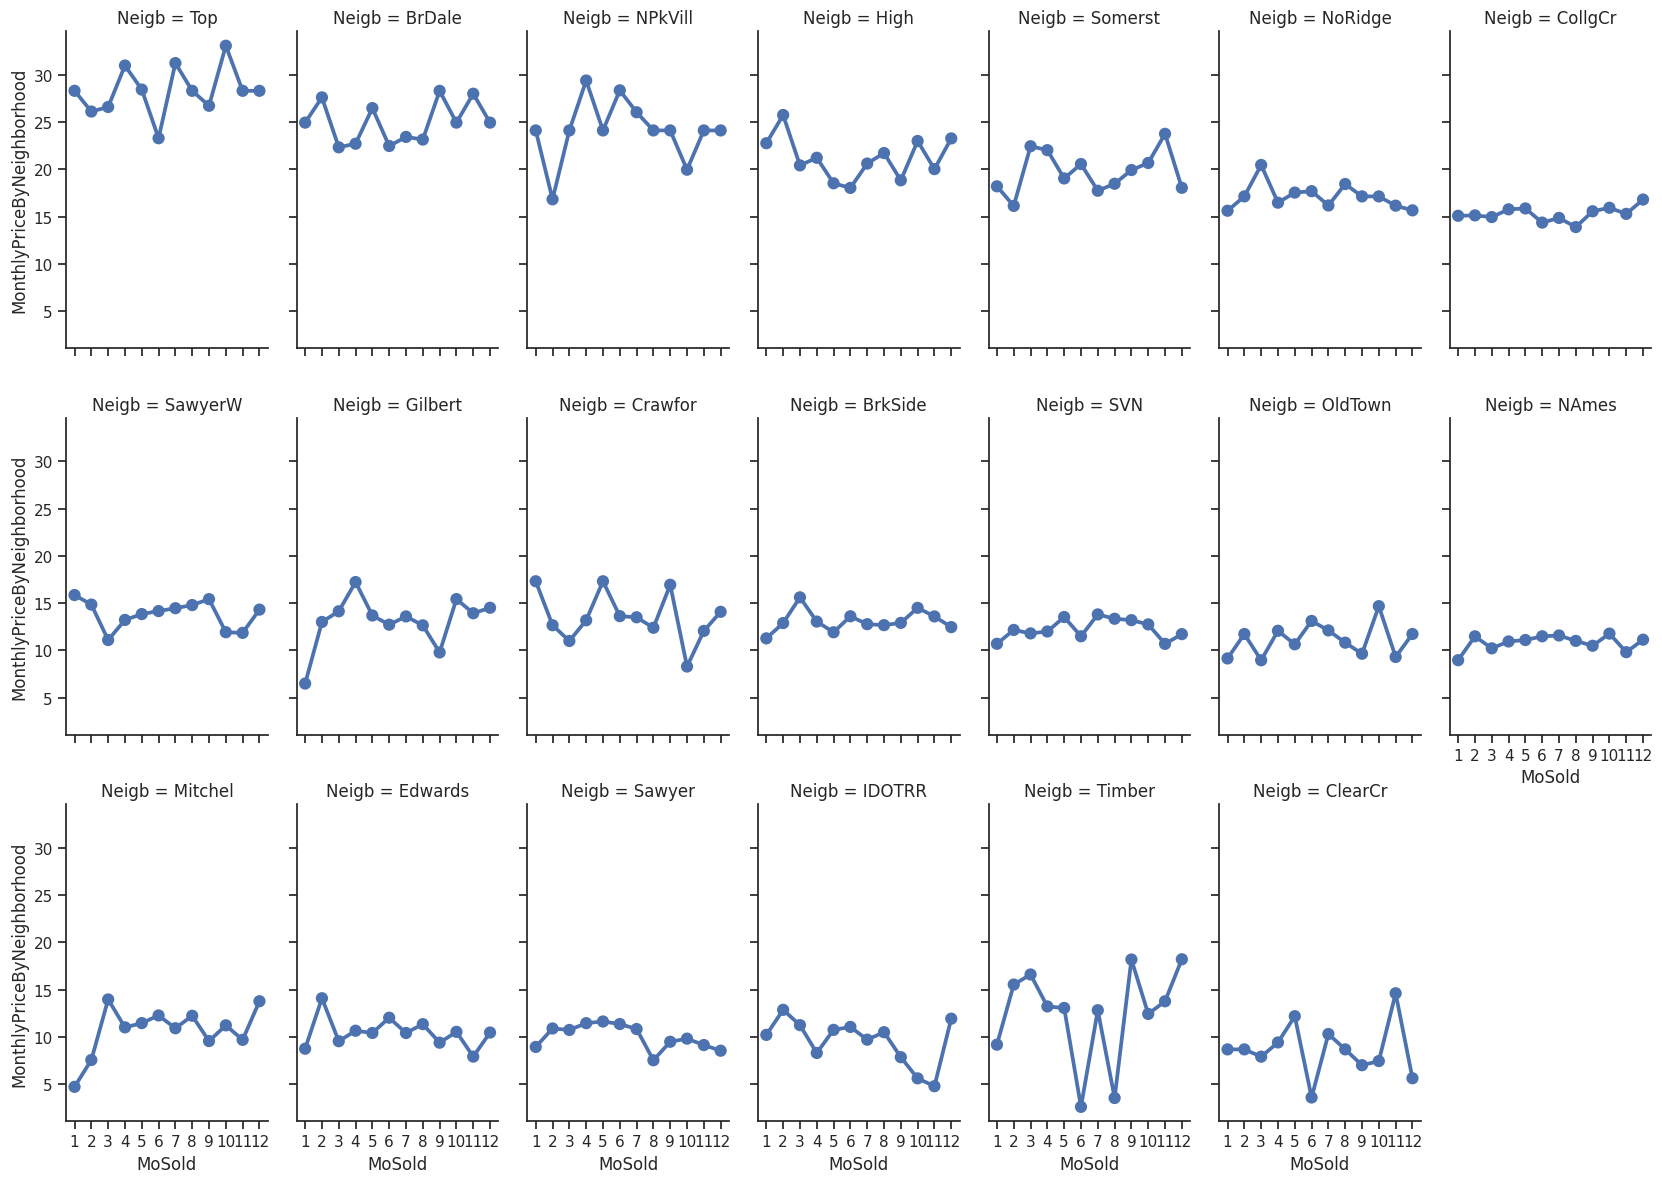

In [161]:
# Bin neighborhood for trade cases with low observations on monthly sales prices per Area (Constructed + Lot) by Neighborhood:
Neigb = {}
Neigb['Blueste'] = 'Top'     # 32.212721
Neigb['Blmngtn'] = 'Top'     # 28.364756
Neigb['BrDale']  = 'BrDale'  # 24.903923
Neigb['NPkVill'] = 'NPkVill' # 23.681105
Neigb['MeadowV'] = 'High'    # 22.034923
Neigb['StoneBr'] = 'High'    # 20.475090
Neigb['NridgHt'] =  'High'   # 20.209245
Neigb['Somerst'] = 'Somerst' # 19.551888
Neigb['NoRidge'] = 'NoRidge' # 17.038145
Neigb['CollgCr'] = 'CollgCr' # 15.134767
Neigb['SawyerW'] = 'SawyerW' # 13.992995
Neigb['Crawfor'] = 'Crawfor' # 13.773418
Neigb['Gilbert'] = 'Gilbert' # 13.260281
Neigb['BrkSide'] = 'BrkSide' # 12.785202
Neigb['SWISU']   = 'SVN'     # 12.635171
Neigb['Veenker'] = 'SVN'     # 12.343735
Neigb['NWAmes']  = 'SVN'     # 12.066590
Neigb['OldTown'] = 'OldTown' # 11.571331
Neigb['NAmes']   = 'NAmes'   # 11.091393
Neigb['Mitchel'] = 'Mitchel' # 10.936368
Neigb['Edwards'] = 'Edwards' # 10.614919
Neigb['Sawyer']  = 'Sawyer'  #10.334445
Neigb['IDOTRR']  = 'IDOTRR'  # 9.880838
Neigb['Timber']  = 'Timber'  # 8.723326
Neigb['ClearCr'] = 'ClearCr' # 6.113654

# Preper dataset for Sales Price per Area (Constructed + Lot) by Neighborhood:
df = train[['SalePrice', 'MoSold', 'Neighborhood']]

df['TotalArea'] = (train.TotalBsmtSF.fillna(0) + train.WoodDeckSF.fillna(0) + train.GrLivArea.fillna(0) + 
                   train.LotArea.fillna(0) + train.MasVnrArea.fillna(0) + train.GarageArea.fillna(0) + 
                   train.OpenPorchSF.fillna(0) + train.TSsnPorch.fillna(0) + train.ScreenPorch.fillna(0) + 
                   train.EnclosedPorch.fillna(0) + train.PoolArea.fillna(0) )
df['Price'] = df.SalePrice/df.TotalArea

# Cut Outliers from Crawfor Neighborhood
df = df[(((df.Neighborhood == 'Crawfor') & (df.Price<30.)) | (df.Neighborhood != 'Crawfor'))]
df.drop(['Price'], axis=1, inplace=True)

df.Neighborhood = train.Neighborhood.map(Neigb)

df = df.groupby(by=['Neighborhood', 'MoSold'], as_index=False).sum()
df['HistPriceByNeighborhood'] = df.SalePrice / df.TotalArea

# Get the index for order by value
Neig = df[['SalePrice', 'TotalArea', 'Neighborhood']].groupby(by='Neighborhood', as_index=False).sum()
Neig['NeigPrice'] = Neig.SalePrice / Neig.TotalArea
Neig.drop(['TotalArea', 'SalePrice'], axis=1, inplace=True)
Neig = Neig.groupby(by='Neighborhood', as_index=True).NeigPrice.sum().sort_values(ascending = False)

df.drop(['TotalArea', 'SalePrice'], axis=1, inplace=True)

# Fill the gaps
fill_values = [
    ['Top', 1, df.HistPriceByNeighborhood[df.Neighborhood=='Top'].mean()],
    ['Top', 8, df.HistPriceByNeighborhood[df.Neighborhood=='Top'].mean()],
    ['Top', 11, df.HistPriceByNeighborhood[df.Neighborhood=='Top'].mean()],
    ['Top', 12, df.HistPriceByNeighborhood[df.Neighborhood=='Top'].mean()],
    ['BrDale', 1, df.HistPriceByNeighborhood[df.Neighborhood=='BrDale'].mean()],
    ['BrDale', 10, df.HistPriceByNeighborhood[df.Neighborhood=='BrDale'].mean()],
    ['BrDale', 12, df.HistPriceByNeighborhood[df.Neighborhood=='BrDale'].mean()],
    ['NPkVill', 1, df.HistPriceByNeighborhood[df.Neighborhood=='NPkVill'].mean()],
    ['NPkVill', 3, df.HistPriceByNeighborhood[df.Neighborhood=='NPkVill'].mean()],
    ['NPkVill', 5, df.HistPriceByNeighborhood[df.Neighborhood=='NPkVill'].mean()],
    ['NPkVill', 8, df.HistPriceByNeighborhood[df.Neighborhood=='NPkVill'].mean()],
    ['NPkVill', 9, df.HistPriceByNeighborhood[df.Neighborhood=='NPkVill'].mean()],
    ['NPkVill', 11, df.HistPriceByNeighborhood[df.Neighborhood=='NPkVill'].mean()],
    ['NPkVill', 12, df.HistPriceByNeighborhood[df.Neighborhood=='NPkVill'].mean()],
    ['NoRidge', 2, df.HistPriceByNeighborhood[df.Neighborhood=='NoRidge'].mean()],
    ['NoRidge', 9, df.HistPriceByNeighborhood[df.Neighborhood=='NoRidge'].mean()],
    ['NoRidge', 10, df.HistPriceByNeighborhood[df.Neighborhood=='NoRidge'].mean()],
    ['Crawfor', 1, df.HistPriceByNeighborhood[df.Neighborhood=='Crawfor'].max()],
    ['Crawfor', 4, df.HistPriceByNeighborhood[df.Neighborhood=='Crawfor'].mean()],
    ['Timber', 10, df.HistPriceByNeighborhood[df.Neighborhood=='Timber'].mean()],
    ['ClearCr', 1, df.HistPriceByNeighborhood[df.Neighborhood=='ClearCr'].mean()],
    ['ClearCr', 2, df.HistPriceByNeighborhood[df.Neighborhood=='ClearCr'].mean()],
    ['ClearCr', 8, df.HistPriceByNeighborhood[df.Neighborhood=='ClearCr'].mean()],
    ['Edwards', 12, df.HistPriceByNeighborhood[df.Neighborhood=='Edwards'].mean()]
]

fill_df = pd.DataFrame(fill_values, columns=df.columns)
df = pd.concat([df, fill_df], ignore_index=True)

# Reserve data to merge with all data set of train and test data
MonthlyPrice = df
MonthlyPrice.columns = ['Neigb', 'MoSold', 'MonthlyPriceByNeighborhood']

print('                         Monthly Hist Sales Prices per Area (Construct + Lot) by Neighborhood:')
g = sns.catplot(y='MonthlyPriceByNeighborhood', x='MoSold', col='Neigb', data=MonthlyPrice,
                kind='point', aspect=.6, col_wrap=7, height=4, col_order=Neig.index)
plt.show()

As we expected, the seasonality does have some effect, but of course we draw this conclusion based only on the above graphs is precipitated if not erroneous, given that even having restricted the views still exist houses with different characteristics in the same neighborhood.

However, this is sufficient to understand that the timing of the sale matters, so the model will probably have to take this into account, or this will be part of the residual errors.

### Check the Dependent Variable - SalePrice:
Since most of the machine learning algorithms start from the principle that our data has a normal distribution, we first take a look at the distribution of our **dependent variable**. For this, I create a procedure to plot the **Sales Distribution** and **QQ-plot** to identify substantive departures from normality, likes ***outliers***, ***skewness*** and ***kurtosis***.

In [162]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

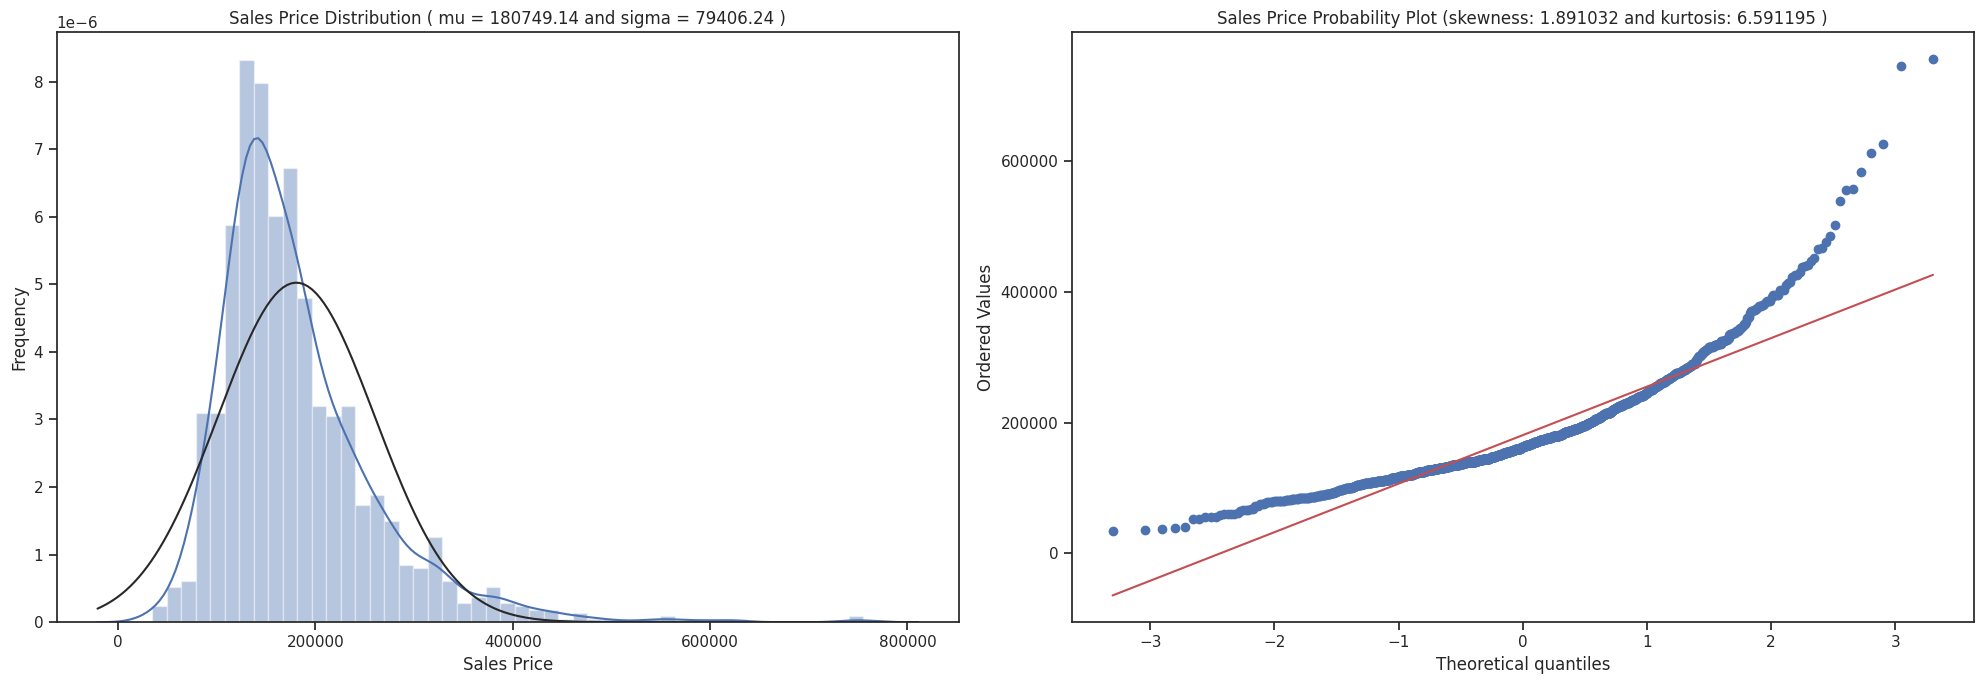

In [163]:
QQ_plot(train.SalePrice, 'Sales Price')

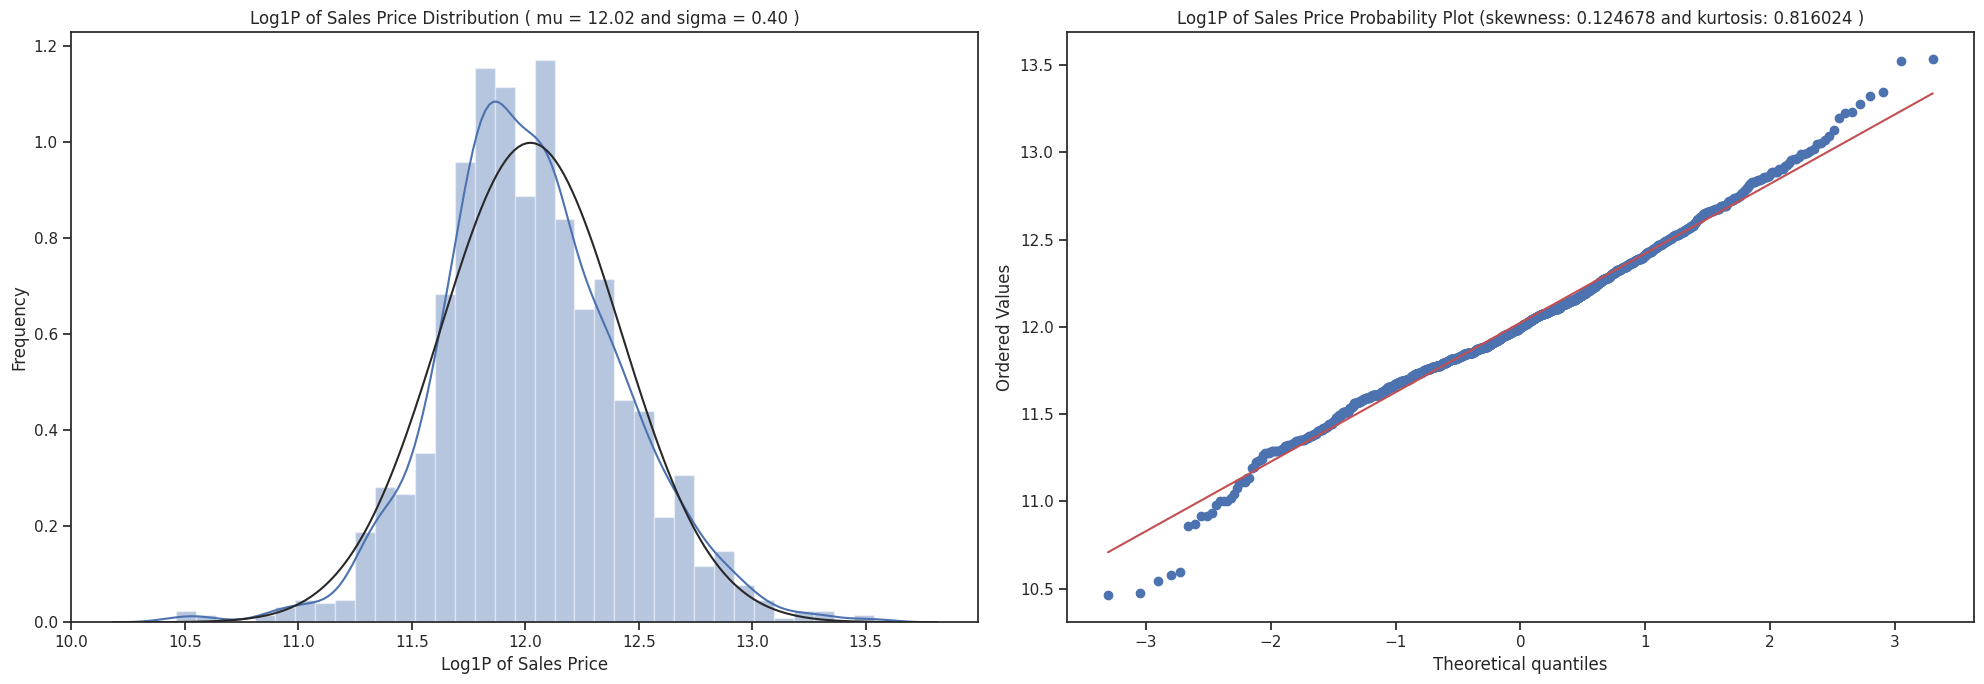

In [164]:
#We use the numpy fuction log1p which applies log(1+x) to all elements of the column
train.SalePrice = np.log1p(train.SalePrice)

QQ_plot(train.SalePrice, 'Log1P of Sales Price')

From the first graph above we can see that Sales Price distribution is ***skewed***, has a **peak**, it **deviates from normal distribution** and is **positively biased**.
From the **Probability Plot**, we could see that **Sales Price** also does **not align with the diagonal  <span style="color:red">red line</span>** which represent normal distribution. The form of its distribution confirm that is a skewed right. 

With ***skewness positive of 1.9***, we confirm the **lack of symmetry** and indicate that Sales Price are **skewed right**, as we can see too at the Sales Distribution plot, skewed right means that the right tail is **long relative to the left tail**. The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

**Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers, and **positive** kurtosis indicates a **heavy-tailed distribution** and **negative** kurtosis indicates a **light tailed distribution**. So, with 6.5 of positive kurtosis **Sales Price** are definitely heavy-tailed and has some **outliers** that we need take care.

<h1>Table of Contents for Statistics tests<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a  href="#Theory" data-toc-modified-id="Theory-2"><span class="toc-item-num">1&nbsp;&nbsp;</span>Theory</a></span><ul class="toc-item"><li><span><a href="#The-process" data-toc-modified-id="The-process-2.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The process</a></span></li><li><span><a href="#Two-tailed-and-One-tailed" data-toc-modified-id="Two-tailed-and-One-tailed-2.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Two-tailed and One-tailed</a></span></li><li><span><a href="#Types-of-tests" data-toc-modified-id="Types-of-tests-2.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Types of tests</a></span></li><li><span><a href="#Normal-distribution" data-toc-modified-id="Normal-distribution-2.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Normal distribution</a></span></li></ul></li><li><span><a href="#Practice" data-toc-modified-id="Practice-3"><span class="toc-item-num">2&nbsp;&nbsp;</span>Practice</a></span><ul class="toc-item"><li><span><a href="#One-sample-T-test-|-Two-tailed-|-Means" data-toc-modified-id="One-sample-T-test-|-Two-tailed-|-Means-3.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>One sample T-test | Two-tailed | Means</a></span></li><li><span><a href="#One-sample-T-test-|-One-tailed-|-Means" data-toc-modified-id="One-sample-T-test-|-One-tailed-|-Means-3.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>One sample T-test | One-tailed | Means</a></span></li><li><span><a href="#Two-sample-T-test-|-Two-tailed-|-Means" data-toc-modified-id="Two-sample-T-test-|-Two-tailed-|-Means-3.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Two sample T-test | Two-tailed | Means</a></span></li><li><span><a href="#Two-sample-T-test-|-One-tailed-|-Means" data-toc-modified-id="Two-sample-T-test-|-One-tailed-|-Means-3.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Two sample T-test | One-tailed | Means</a></span></li><li><span><a href="#Two-sample-Z-test-|-One-tailed-|-Means" data-toc-modified-id="Two-sample-Z-test-|-One-tailed-|-Means-3.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Two sample Z-test | One-tailed | Means</a></span></li><li><span><a href="#Two-sample-Z-test-|-One-tailed-|-Proportions" data-toc-modified-id="Two-sample-Z-test-|-One-tailed-|-Proportions-3.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Two sample Z-test | One-tailed | Proportions</a></span></li><li><span><a href="#One-sample-Z-test-|-One-tailed-|-Means" data-toc-modified-id="One-sample-Z-test-|-One-tailed-|-Means-3.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>One sample Z-test | One-tailed | Means</a></span></li><li><span><a href="#One-sample-Z-test-|-One-tailed-|-Proportions" data-toc-modified-id="One-sample-Z-test-|-One-tailed-|-Proportions-3.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>One sample Z-test | One-tailed | Proportions</a></span></li><li><span><a href="#F-test-(ANOVA)" data-toc-modified-id="F-test-(ANOVA)-3.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>F-test (ANOVA)</a></span></li><li><span><a href="#Chi-square-test" data-toc-modified-id="Chi-square-test-3.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Chi-square test</a></span></li></ul>

Let's say our name is Mehrdad Baradaran and we are planning to move to Ames, Iowa, with a $120 000 budget to buy a house.<br>
We have no idea about the real estate market in the city.<br>
However the City Hall owns a precious piece of information : the House Price Dataset.<br>
It contains about 1500 lines of data about houses in the city, with attributes like Sale Price, Living Area, Garage Type, etc...<br><br>
The bad news is we can not access the entire database, it is too expensive.<br> 
The good news is the City Hall proposes some samples : free for up to 25 observations, with a small fee for up to 100 observations.<br>
So we'll make use of this great offer to know a bit more about the real estate market, and understand what we can get for our money.<br><br>


In [170]:
import pandas as pd
pd.set_option('max_colwidth', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from statsmodels.stats.weightstats import *
import scipy.stats

#this is the entire dataset, but we'll only be able to use to extract samples from it.
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# Theory

What we will be trying to do in this tutorial is make assumptions on the whole population of houses based only on the samples at our disposal.<br>
This is what statistical tests do, but one must know a few principles before using them.

## The process

The basic process of statistical tests is the following : 
- Stating a Null Hypothesis (most often : "the two values are not different")
- Stating an Alternative Hypothesis (most often : "the two values are different")
- Defining an alpha value, which is a confidence level (most often : 95%). The higher it is, the harder it will be to validate the Alternative Hypothesis, but the more confident we will be if we do validate it.
- Depending on data at disposal, we choose the relevant test (Z-test, T-test, etc... More on that later)
- The test computes a score, which corresponds to a p-value.
- If p-value is below 1-alpha (0.05 if alpha is 95%), we can accept the Alternative Hypothesis (or "reject the Null Hypothesis"). If it is over, we'll have to stick with the Null Hypothesis (or "fail to reject the Null Hypothesis").


There's a built-in function for most statistical tests out there.<br>
Let's also build our own function to summarize all the information.<br>
All tests we will conduct from now on are based on alpha = 95%.

In [171]:
def results(p):
    if(p['p_value']<0.05):p['hypothesis_accepted'] = 'alternative'
    if(p['p_value']>=0.05):p['hypothesis_accepted'] = 'null'

    df = pd.DataFrame(p, index=[''])
    cols = ['value1', 'value2', 'score', 'p_value', 'hypothesis_accepted']
    return df[cols]

## Two-tailed and One-tailed

Two-tails tests are used to show two values are just "different".<br>
One-tail tests are used to show one value is either "larger" or "lower" than another one.<br><br>
This has an influence on the p-value : in case of one-tail tests, p-value has to be divided by 2.<br>
<br>
Most of the functions we'll use (those from the statweights modules) do that by themselves if we input the right information in the parameters.<br>
We'll have to do it on our own with functions from the scipy module.

## Types of tests

There are different types of tests, here are the ones we will cover : 
- T-tests. Used for small sample sizes (n<30), and when population's standard deviation is unknown.
- Z-tests. Used for large sample sizes (n=>30), and when population's standard deviation is known.
- F-tests. Used for comparing values of more than two variables.
- Chi-square. Used for comparing categorical data.

## Normal distribution

Also, most tests - parametric tests - require a population that is normally distributed.<br>
It it not the case for SalePrice - which we'll use for most tests - but we can fix this by log-transforming the variable.<br>
Note that to go back to our original scale and understand values vs. our \\$120 000, we'll to exponantiate values back.

In [172]:
import numpy as np
df['SalePrice'] = np.log1p(df['SalePrice'])
logged_budget = np.log1p(120000) #logged $120 000 is 11.695
logged_budget

11.695255355062795

# Practice

So let's say we are ready to dive into the data, but not ready to pay the small fee for the large sample size.<br>
We'll be starting with the free samples of 25 observations.

In [173]:
sample = df.sample(n=25)
p = {} #dictionnary we'll use to stock information and results

## One sample T-test | Two-tailed | Means

So first question we want to ask is : How are our \\$120 000 situated vs. the average Ames house SalePrice? <br>
In other words, is 120 000 (11.7 logged) any different from the mean SalePrice of the population?<br>
To know that from a 25 observations sample, we need to use a One Sample T-Test.

<b>Null Hypothesis</b> :  Mean SalePrice = 11.695 <br>
<b>Alternative Hypothesis</b> :  Mean SalePrice ≠ 11.695 <br>

In [174]:
p['value1'], p['value2'] = sample['SalePrice'].mean(), logged_budget
p['score'], p['p_value'] = stats.ttest_1samp(sample['SalePrice'], popmean=logged_budget)
results(p)

,value1,value2,score,p_value,hypothesis_accepted
,12.108,11.695,5.640,0.000,alternative


So we know our initial budget is significantely different from the mean SalePrice.<br>
From the table above, it unfortunately seems lower.<br>

## One sample T-test | One-tailed | Means

Let's make sure our budget is lower by running a one-tailed test.<br>
Question now is : is 120 000 (11.695 logged) lower than the mean SalePrice of the population?<br>

<b>Null Hypothesis</b> :  Mean SalePrice <= 11.695 <br>
<b>Alternative Hypothesis</b> :  Mean SalePrice > 11.695 <br>

In [175]:
p['value1'], p['value2'] = sample['SalePrice'].mean(), logged_budget
p['score'], p['p_value'] = stats.ttest_1samp(sample['SalePrice'], popmean=logged_budget)
p['p_value'] = p['p_value']/2 #one-tailed test (with scipy function), we need to divide p-value by 2 ourselves
results(p)

,value1,value2,score,p_value,hypothesis_accepted
,12.108,11.695,5.640,0.000,alternative


Unfortunately it is!<br>
We have 95% chance of believing that our starting budget won't let us buy a house at the average Ames price.

## Two sample T-test | Two-tailed | Means

Now that our expectations are lowered, we realize something important :<br>
The entire dataset probably contains some big houses fitted for entire families as well as small houses for fewer inhabitants.<br>
Prices are probably really different in-between the two types.<br>
And we are moving in alone, so we probably don't need that big of a house.<br><br>
What if we could ask the City Hall to give us a sample for big houses, and a sample for smaller houses?<br>
We first could see if there is a significant difference in prices.<br>
And then see how our \\$120 000 are doing against the small houses average SalePrice.<br><br>
We do ask the City Hall, and because they understand it is also for the sake of this tutorial, they accept.<br>
They say they'll split the dataset in two, based on the surface area of the houses.<br>
They will give us a sample from the top 50\% houses in terms of surface, and another sample from the bottom 50\%.

In [176]:
smaller_houses = city_hall_dataset.sort_values('GrLivArea')[:730].sample(n=25)
larger_houses = city_hall_dataset.sort_values('GrLivArea')[730:].sample(n=25)

Now we first want to know if the two samples, extracted from two different populations, have significant differences in their average SalePrice.

<b>Null Hypothesis</b> : SalePrice of smaller houses = SalePrice of larger houses <br>
<b>Alternative Hypothesis</b> :  SalePrice of smaller houses ≠ SalePrice of larger houses <br>

In [177]:
p['value1'], p['value2'] = smaller_houses['SalePrice'].mean(), larger_houses['SalePrice'].mean()
p['score'], p['p_value'], p['df'] = ttest_ind(smaller_houses['SalePrice'], larger_houses['SalePrice'])
results(p)

,value1,value2,score,p_value,hypothesis_accepted
,129329.800,210870.000,-5.578,0.000,alternative


As expected, the two samples show some significant differences in SalePrice.


## Two sample T-test | One-tailed | Means

Obviously, larger houses have a higher SalePrice.<br>
Let's prove it this with one-tailed test.

<b>Null Hypothesis</b> : SalePrice of smaller houses >= SalePrice of larger houses <br>
<b>Alternative Hypothesis</b> :  SalePrice of smaller houses < SalePrice of larger houses <br>

In [179]:
p['value1'], p['value2'] = smaller_houses['SalePrice'].mean(), larger_houses['SalePrice'].mean()
p['score'], p['p_value'], p['df'] = ttest_ind(smaller_houses['SalePrice'], larger_houses['SalePrice'], alternative='smaller')
results(p)

,value1,value2,score,p_value,hypothesis_accepted
,129329.800,210870.000,-5.578,0.000,alternative


Still as expected, SalePrice is significantly higher for larger houses.

## Two sample Z-test | One-tailed | Means

Now that the City Hall has already splitted the population in two, why not ask them for larger samples?<br>
We'll pay a fee but that's all right, this is fake money.

In [181]:
smaller_houses = city_hall_dataset.sort_values('GrLivArea')[:730].sample(n=100, random_state=1)
larger_houses = city_hall_dataset.sort_values('GrLivArea')[730:].sample(n=100, random_state=1)

<b>Null Hypothesis</b> : SalePrice of smaller houses >= SalePrice of larger houses <br>
<b>Alternative Hypothesis</b> :  SalePrice of smaller houses < SalePrice of larger houses <br>

In [182]:
p['value1'], p['value2'] = smaller_houses['SalePrice'].mean(), larger_houses['SalePrice'].mean()
p['score'], p['p_value'] = ztest(smaller_houses['SalePrice'], larger_houses['SalePrice'], alternative='smaller')
results(p)

,value1,value2,score,p_value,hypothesis_accepted
,135311.110,222687.110,-9.117,0.000,alternative


Higher sample sizes show the same results : SalePrice is significantely higher for larger houses.

## Two sample Z-test | One-tailed | Proportions

Instead of means, we can also run tests on proportions.<br>
Is the proportion of houses over \\$120 000 higher in the larger houses populations than in smaller houses population?

<b>Null Hypothesis</b> : Proportion of smaller houses with SalePrice over 11.695 >= Proportion of larger houses with SalePrice over 11.695 <br>
<b>Alternative Hypothesis</b> :  Proportion of smaller houses with SalePrice over 11.695 < Proportion of larger houses with SalePrice over 11.695 <br>

In [183]:
from statsmodels.stats.proportion import *
A1 = len(smaller_houses[smaller_houses.SalePrice>logged_budget])
B1 = len(smaller_houses)
A2 = len(larger_houses[larger_houses.SalePrice>logged_budget])
B2 = len(larger_houses)
p['value1'], p['value2'] = A1/B1, A2/B2
p['score'], p['p_value'] = proportions_ztest([A1, A2], [B1, B2], alternative='smaller')
results(p)

,value1,value2,score,p_value,hypothesis_accepted
,1.000,1.000,NaN,NaN,alternative


Logically, the test shows that the larger houses population has a higher ratio of houses sold over \$120 000 vs. the smaller houses population.

## One sample Z-test | One-tailed | Means

So now let's see how our \$120 000  (11.7 logged) are doing against smaller houses only, based on the 100 observations sample.

<b>Null Hypothesis</b> :  Mean SalePrice of smaller houses => 11.695 <br>
<b>Alternative Hypothesis</b> :  Mean SalePrice of smaller houses < 11.695 <br>

In [184]:
p['value1'], p['value2'] = smaller_houses['SalePrice'].mean(), logged_budget
p['score'], p['p_value'] = ztest(smaller_houses['SalePrice'], value=logged_budget, alternative='larger')
results(p)

,value1,value2,score,p_value,hypothesis_accepted
,135311.110,11.695,42.890,0.000,alternative


That's quite depressing : our \\$120 000 do not even beat the average price of smaller houses.

## One sample Z-test | One-tailed | Proportions

Our \\$120 000 do not seem too far from the average SalePrice of small houses though.<br>
Let's see if at least 25\% of houses have a SalePrice in our budget.

<b>Null Hypothesis</b> : Proportion of smaller houses with SalePrice under 11.695 <= 25% <br>
<b>Alternative Hypothesis</b> :  Proportion of smaller houses with SalePrice under 11.695 > 25% <br>

In [185]:
from statsmodels.stats.proportion import *
A = len(smaller_houses[smaller_houses.SalePrice<logged_budget])
B = len(smaller_houses)
p['value1'], p['value2'] = A/B, 0.25
p['score'], p['p_value'] = proportions_ztest(A, B, alternative='larger', value=0.25)
results(p)

,value1,value2,score,p_value,hypothesis_accepted
,0.000,0.250,-inf,1.000,null


So at least, now we know we can buy a house among at least 25% of the smaller houses.<br>


## F-test (ANOVA)

The House Price Dataset has a MSZoning variable, which identifies the general zoning classification of the house.<br>
For instance, it lets you know if the house is situated in a residential or a commerical zone.<br><br>
We'll therefore try to know if there is a significant difference in SalePrice based on the zoning.<br>
And then know where we will be more likely to live with our budget.<br>
Based on the 100 observations samples of smaller houses, let's first have an overview of mean SalePrice by zone.

In [186]:
replacement = {'FV': "Floating Village Residential", 'C (all)': "Commercial", 'RH': "Residential High Density",
              'RL': "Residential Low Density", 'RM': "Residential Medium Density"}
smaller_houses['MSZoning_FullName'] = smaller_houses['MSZoning'].replace(replacement)
mean_price_by_zone = smaller_houses.groupby('MSZoning_FullName')['SalePrice'].mean().to_frame()
mean_price_by_zone

,SalePrice
MSZoning_FullName,
Commercial,108000.000
Floating Village Residential,168233.333
Residential High Density,127633.333
Residential Low Density,140328.918
Residential Medium Density,114575.000


To know if there is a significant difference between these values, we run an ANOVA test. (because there a more than 2 values to compare)<br>
The test won't not able to tell us what attributes are different from the others, but at least we'll know if there is a difference or not.

<b>Null Hypothesis</b> : No difference between SalePrice means <br>
<b>Alternative Hypothesis</b> : Difference between SalePrice means <br>

In [187]:
sh = smaller_houses.copy()
p['score'], p['p_value'] = stats.f_oneway(sh.loc[sh.MSZoning=='FV', 'SalePrice'], 
               sh.loc[sh.MSZoning=='C (all)', 'SalePrice'],
               sh.loc[sh.MSZoning=='RH', 'SalePrice'],
               sh.loc[sh.MSZoning=='RL', 'SalePrice'],
               sh.loc[sh.MSZoning=='RM', 'SalePrice'],)
results(p)[['score', 'p_value', 'hypothesis_accepted']]

,score,p_value,hypothesis_accepted
,4.136,0.004,alternative


There is a difference between SalePrices based on where the house is located.<br>
Looking at the Average SalePrice by zone, Commerical Zones and Residential High Density zones seem to be the most affordable for our budget.

## Chi-square test

One last question we'll address : can we get a garage? If yes, what type of garage?<br>
If not, then we won't bother saving up for a car, and we'll try to get a house next to Public Transportion.<br>
The dataset contains a categorical variable, GarageType, that will help us answer the question.<br>
<br>

In [188]:
smaller_houses['GarageType'].fillna('No Garage', inplace=True)
smaller_houses['GarageType'].value_counts().to_frame()

,count
GarageType,
Attchd,46
Detchd,41
No Garage,10
CarPort,2
Basment,1


We know we can get a house in at least the bottom 25% of smaller houses.<br>
We would ideally like to know if distribution of Garage Types among these 25% is different than in the three other quarters<br>
We are now friends with the City Hall, so we can ask them one last favor : <br>
Split the smaller houses population in 4 based on surface, and give us a sample of each quarter.<br>
Because we working here with categorical data, we'll run a Chi-Square test.

In [189]:
city_hall_dataset['GarageType'].fillna('No Garage', inplace=True)
sample1 = city_hall_dataset.sort_values('GrLivArea')[:183].sample(n=100)
sample2 = city_hall_dataset.sort_values('GrLivArea')[183:366].sample(n=100)
sample3 = city_hall_dataset.sort_values('GrLivArea')[366:549].sample(n=100)
sample4 = city_hall_dataset.sort_values('GrLivArea')[549:730].sample(n=100)
dff = pd.concat([
    sample1['GarageType'].value_counts().to_frame(),
    sample2['GarageType'].value_counts().to_frame(), 
    sample3['GarageType'].value_counts().to_frame(), 
    sample4['GarageType'].value_counts().to_frame()], 
    axis=1, sort=False)
dff.columns = ['Sample1 (smallest houses)', 'Sample2', 'Sample3', 'Sample4 (largest houses)']
dff = dff[:3] #chi-square tests do not work when table contains some 0, we take only the most frequent attributes
dff 

,Sample1 (smallest houses),Sample2,Sample3,Sample4 (largest houses)
GarageType,,,,
Detchd,51.000,34.000,31.000,22.000
Attchd,33.000,50.000,59.000,68.000
No Garage,14.000,8.000,6.000,6.000


<b>Null Hypothesis</b> : No difference between GarageType distribution <br>
<b>Alternative Hypothesis</b> : Difference between GarageType distribution <br>

In [190]:
p['score'], p['p_value'], p['ddf'], p['contigency'] = stats.chi2_contingency(dff)
p.pop('contigency')
results(p)[['score', 'p_value', 'hypothesis_accepted']]

,score,p_value,hypothesis_accepted
,29.850,0.000,alternative


Clearly there's a difference in GarageType distribution according to size of houses.<br>
The sample that concerns us, Sample1, has the highest proportion of "No Garage" and "Detached Garage".<br>
We'll probably have to stick with Public Transportation.